In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-03.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-02.csv
/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv


In [2]:
#Importing Libraries
# !pip3 install graphviz
# !pip3 install dask
# !pip install "dask[complete]" 
# !pip3 install toolz
# !pip3 install cloudpickle
# https://www.youtube.com/watch?v=ieW3G7ZzRZ0
# https://github.com/dask/dask-tutorial
# please do go through this python notebook: https://github.com/dask/dask-tutorial/blob/master/07_dataframe.ipynb
import dask.dataframe as dd#similar to pandas

import dask.dataframe as dd
from dask import visualize # for viz

import pandas as pd#pandas to create small dataframes 

#!pip3 install folium
# if this doesnt work refere install_folium.JPG in drive
import folium #open street map

# unix time: https://www.unixtimestamp.com/
import datetime #Convert to unix time

import time #Convert to unix time

# if numpy is not installed already : pip3 install numpy
import numpy as np#Do aritmetic operations on arrays

# matplotlib: used to plot graphs
import matplotlib
# matplotlib.use('nbagg') : matplotlib uses this protocall which makes plots more user intractive like zoom in and zoom out
matplotlib.use('nbagg')
import matplotlib.pylab as plt
import seaborn as sns#Plots
from matplotlib import rcParams#Size of plots  

# this lib is used while we calculate the stight line distance between two (lat,lon) pairs in miles
#!pip install gpxpy
import gpxpy.geo #Get the haversine distance

from sklearn.cluster import MiniBatchKMeans, KMeans#Clustering
import math
import pickle
import os

# download migwin: https://mingw-w64.org/doku.php/download/mingw-builds
# install it in your system and keep the path, migw_path ='installed path'
# mingw_path = 'C:\\Program Files\\mingw-w64\\x86_64-5.3.0-posix-seh-rt_v4-rev0\\mingw64\\bin'
# os.environ['PATH'] = mingw_path + ';' + os.environ['PATH']

# to install xgboost: pip3 install xgboost
# if it didnt happen check install_xgboost.JPG
import xgboost as xgb

# to install sklearn: pip install -U scikit-learn
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import warnings
#warnings.filterwarnings("ignore")



In [3]:
warnings.filterwarnings("ignore")


In [4]:
import graphviz

In [5]:
month = dd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')
print(month.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RateCodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')


In [6]:
# compare pd with dd

import time

start_time = time.time()
df = pd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')
end_time = time.time()

print("Time taken to read CSV file for pandas :", end_time - start_time, "seconds")


Time taken to read CSV file for pandas : 66.29660415649414 seconds


In [7]:
# dd DF

start_time = time.time()


df=dd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2015-01.csv')

end_time = time.time()

print("Time taken to read CSV file for dask dataframe:", end_time - start_time, "seconds")

Time taken to read CSV file for dask dataframe: 0.7065286636352539 seconds


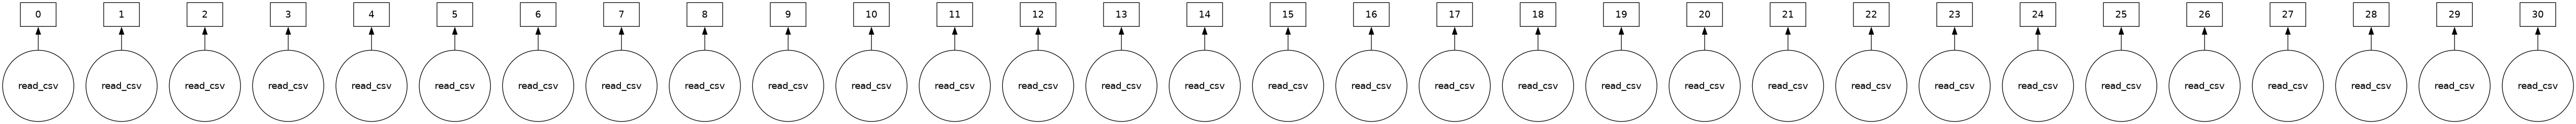

In [8]:

# Visualize the Dask graph
visualize(month, filename='dask_graph.png')


**Viz fare amount**

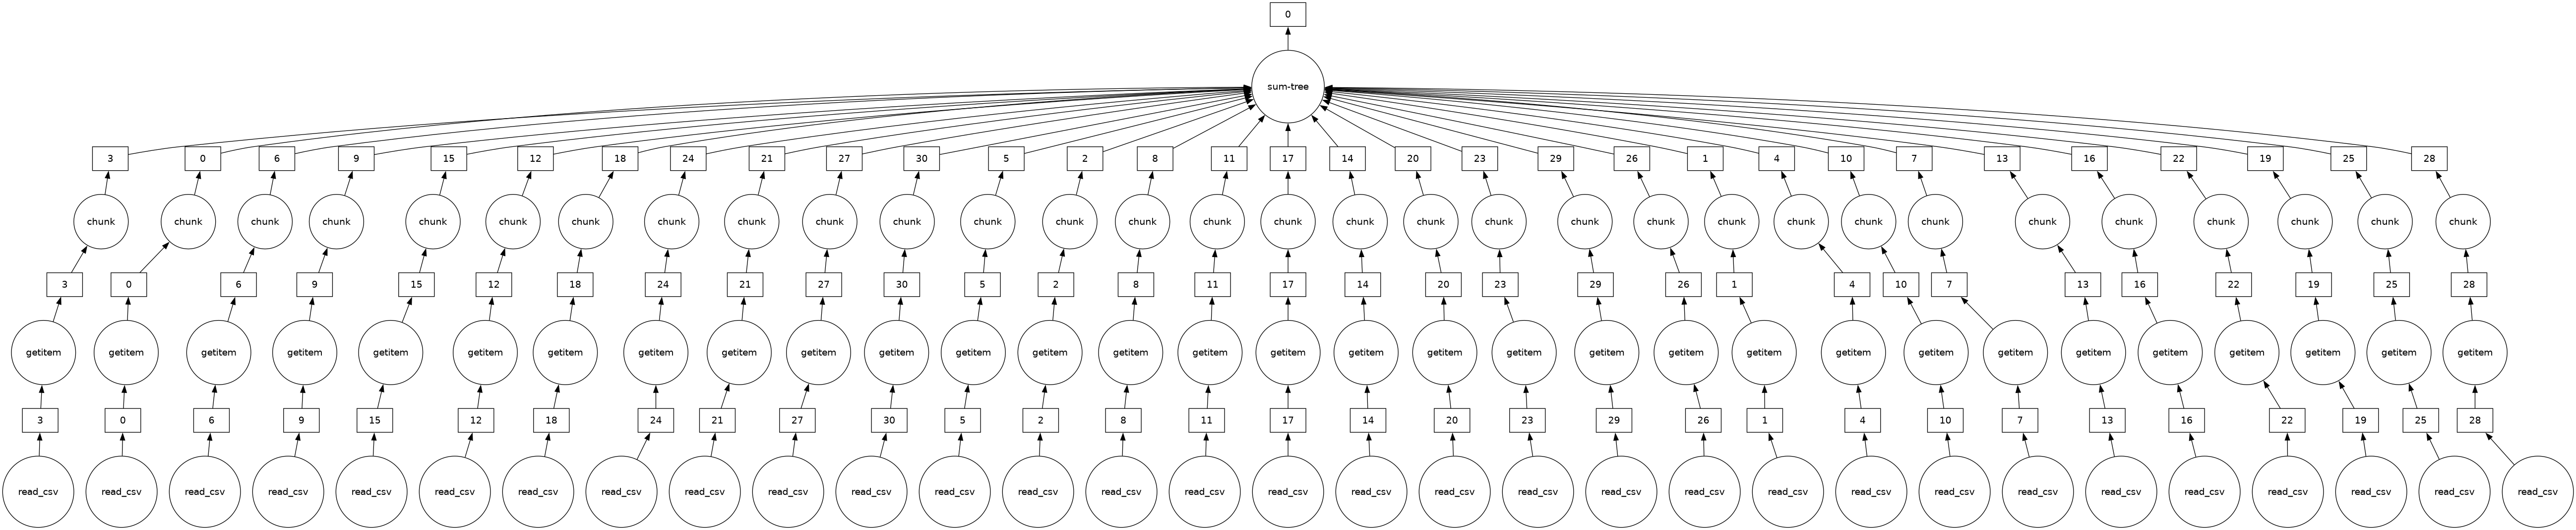

In [9]:
result = month.fare_amount.sum()
visualize(result, filename='fare_amount_sum_graph.png')



In [10]:
month.head(5)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1   
1                  N         -73.994415         40.759109             1   
2                  N         -73.951820         40.824413             2   
3                  N         -74.004326         40.719986             2   
4                  N         -74.004181         40.742653             2   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.0    1.0      0.5        3.25           0.0   
1         14.5    0.5      0.5        2.00           0.0   
2          9.5    0.5      0.5        0.00           0.0   
3          3.5    0.5      0.5        0.00           0.0   
4         15.0    0.5      0.5        0.00           0.0   

   improvement_surcharge  total_amount  
0                    0.3         17.05  
1                    0.3         17.80  
2                    0.3         10.80  
3                    0.3          4.80  
4                    0.3         16.30

In [11]:
# for i,j in sample_locations.iterrows():
#     if int(j['pickup_latitude']) != 0:
#         folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)


### 1. Pickup Latitude and Pickup Longitude

In [12]:
outlier_locations=month[((month.pickup_longitude<=-74.2591)|(month.pickup_latitude<=40.4774)|
                        (month.pickup_longitude>=-73.7004)|(month.pickup_longitude>=40.9176))]


sample_locations=outlier_locations.head(10000)
map_osm = folium.Map(location=[40.73061, -73.935242])

# Display the map

for i,j in sample_locations.iterrows():
    if int(j['pickup_latitude'])!=0:
        folium.Marker(list((j['pickup_latitude'],j['pickup_longitude']))).add_to(map_osm)
map_osm

### 2. Dropoff Latitude & Dropoff Longitude

In [13]:
outlier_locations=month[((month.dropoff_longitude<=-74.2591)|(month.dropoff_latitude<=40.4774)|
                        (month.dropoff_longitude>=-73.7004)|(month.dropoff_latitude>=40.9176))]


sample_locations=outlier_locations.head(10000)
map_osm = folium.Map(location=[40.73061, -73.935242])

# Display the map

for i,j in sample_locations.iterrows():
    if int(j['dropoff_latitude'])!=0:
        folium.Marker(list((j['dropoff_latitude'],j['dropoff_longitude']))).add_to(map_osm)
map_osm

In [14]:
# dropoff_longitude', 'dropoff_latitude',

In [15]:
month.head(10)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2015-01-15 19:05:39   2015-01-15 19:23:42                1   
1         1  2015-01-10 20:33:38   2015-01-10 20:53:28                1   
2         1  2015-01-10 20:33:38   2015-01-10 20:43:41                1   
3         1  2015-01-10 20:33:39   2015-01-10 20:35:31                1   
4         1  2015-01-10 20:33:39   2015-01-10 20:52:58                1   
5         1  2015-01-10 20:33:39   2015-01-10 20:53:52                1   
6         1  2015-01-10 20:33:39   2015-01-10 20:58:31                1   
7         1  2015-01-10 20:33:39   2015-01-10 20:42:20                3   
8         1  2015-01-10 20:33:39   2015-01-10 21:11:35                3   
9         1  2015-01-10 20:33:40   2015-01-10 20:40:44                2   

   trip_distance  pickup_longitude  pickup_latitude  RateCodeID  \
0           1.59        -73.993896        40.750111           1   
1           3.30        -74.001648        40.724243           1   
2           1.80        -73.963341        40.802788           1   
3           0.50        -74.009087        40.713818           1   
4           3.00        -73.971176        40.762428           1   
5           9.00        -73.874374        40.774048           1   
6           2.20        -73.983276        40.726009           1   
7           0.80        -74.002663        40.734142           1   
8          18.20        -73.783043        40.644356           2   
9           0.90        -73.985588        40.767948           1   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -73.974785         40.750618             1   
1                  N         -73.994415         40.759109             1   
2                  N         -73.951820         40.824413             2   
3                  N         -74.004326         40.719986             2   
4                  N         -74.004181         40.742653             2   
5                  N         -73.986977         40.758194             1   
6                  N         -73.992470         40.749634             2   
7                  N         -73.995010         40.726326             1   
8                  N         -73.987595         40.759357             2   
9                  N         -73.985916         40.759365             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         12.0    1.0      0.5        3.25          0.00   
1         14.5    0.5      0.5        2.00          0.00   
2          9.5    0.5      0.5        0.00          0.00   
3          3.5    0.5      0.5        0.00          0.00   
4         15.0    0.5      0.5        0.00          0.00   
5         27.0    0.5      0.5        6.70          5.33   
6         14.0    0.5      0.5        0.00          0.00   
7          7.0    0.5      0.5        1.66          0.00   
8         52.0    0.0      0.5        0.00          5.33   
9          6.5    0.5      0.5        1.55          0.00   

   improvement_surcharge  total_amount  
0                    0.3         17.05  
1                    0.3         17.80  
2                    0.3         10.80  
3                    0.3          4.80  
4                    0.3         16.30  
5                    0.3         40.33  
6                    0.3         15.30  
7                    0.3          9.96  
8                    0.3         58.13  
9                    0.3          9.35

### 3. Trip Durations:

In [16]:
# convert to unix timestamp

In [17]:
import datetime

def unix_tm(a):
    """Converts a timestamp string in ISO format to Unix timestamp.

    Args:
        a: The timestamp string in the format YYYY-MM-DD HH:MM:SS.

    Returns:
        The Unix timestamp of the input string.
    """
    timestamp_dt = datetime.datetime.fromisoformat(a)
    unix_tmm = int(timestamp_dt.timestamp())
    return unix_tmm

# Example usage
# timestamp_str = "2023-11-19 10:23:59"
# unix_timestamp = unix_tm(timestamp_str)
# print(unix_timestamp)


In [18]:
def return_with_trip_times(month):
    duration =month[['tpep_pickup_datetime','tpep_dropoff_datetime']].compute()
    duration_pickup=[unix_tm(a) for a in duration['tpep_pickup_datetime'].values]
    duration_drop=[unix_tm(a) for a in duration['tpep_dropoff_datetime'].values]
    duration=(np.array(duration_drop)-np.array(duration_pickup))/float (60)
    new_frame=month[['passenger_count','trip_distance','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','total_amount']].compute()
    
    new_frame['trip_times']=duration
    new_frame['pickup_times']=duration_pickup
    new_frame['speed']=60*(new_frame['trip_distance']/new_frame['trip_times'])
    return new_frame

frame_with_durations = return_with_trip_times(month)

In [19]:
frame_with_durations

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                     1           1.59        -73.993896        40.750111   
1                     1           3.30        -74.001648        40.724243   
2                     1           1.80        -73.963341        40.802788   
3                     1           0.50        -74.009087        40.713818   
4                     1           3.00        -73.971176        40.762428   
...                 ...            ...               ...              ...   
411302                2           1.00        -73.951988        40.786217   
411303                2           0.80        -73.982742        40.728184   
411304                1           3.40        -73.979324        40.749550   
411305                1           1.30        -73.999565        40.738483   
411306                1           0.70        -73.960350        40.766399   

        dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0              -73.974785         40.750618         17.05   18.050000   
1              -73.994415         40.759109         17.80   19.833333   
2              -73.951820         40.824413         10.80   10.050000   
3              -74.004326         40.719986          4.80    1.866667   
4              -74.004181         40.742653         16.30   19.316667   
...                   ...               ...           ...         ...   
411302         -73.953735         40.775162          7.55    3.933333   
411303         -73.974976         40.720013          8.80    5.700000   
411304         -73.969101         40.787800         14.30   13.283333   
411305         -73.981819         40.737652         13.55   15.316667   
411306         -73.968643         40.760777          6.30    5.800000   

        pickup_times      speed  
0         1421348739   5.285319  
1         1420922018   9.983193  
2         1420922018  10.746269  
3         1420922019  16.071429  
4         1420922019   9.318378  
...              ...        ...  
411302    1420916504  15.254237  
411303    1420916504   8.421053  
411304    1420916504  15.357591  
411305    1420916504   5.092492  
411306    1420916505   7.241379  

[12748986 rows x 10 columns]

In [20]:
# box plot to cbheck outliers

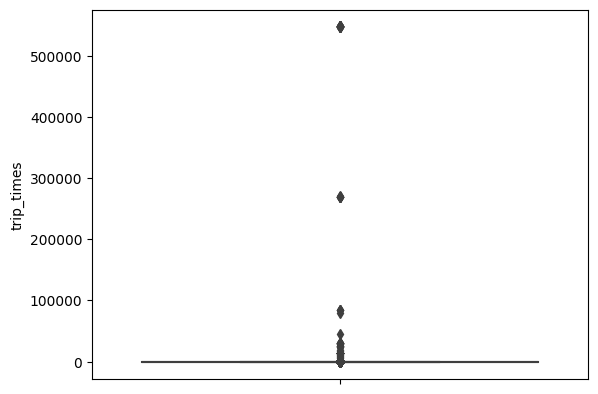

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(y="trip_times", data=frame_with_durations)
plt.show()

In [22]:
# checking percentile value for outliers
var=frame_with_durations['trip_times'].values
var_sorted=np.sort(var)
for i in range(0,100,10):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])




0 percent value is -1211.0166666666667
10 percent value is 3.8333333333333335
20 percent value is 5.383333333333334
30 percent value is 6.816666666666666
40 percent value is 8.3
50 percent value is 9.95
60 percent value is 11.866666666666667
70 percent value is 14.283333333333333
80 percent value is 17.633333333333333
90 percent value is 23.45
100 percentile value is  548555.6333333333


In [23]:
#gazing up from the 99th percentile



for i in range(90,100):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])


90 percent value is 23.45
91 percent value is 24.35
92 percent value is 25.383333333333333
93 percent value is 26.55
94 percent value is 27.933333333333334
95 percent value is 29.583333333333332
96 percent value is 31.683333333333334
97 percent value is 34.46666666666667
98 percent value is 38.71666666666667
99 percent value is 46.75
100 percentile value is  548555.6333333333


In [24]:
# use TLC standards to remove the outlier

frame_with_duration_mod=frame_with_durations[(frame_with_durations.trip_times>1)& (frame_with_durations.trip_times<720)]

In [25]:
(12635246/12748986)*100

99.10785061651177

<Axes: ylabel='trip_times'>

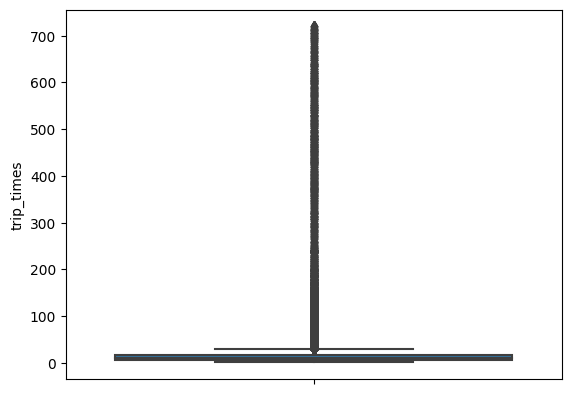

In [26]:
#box-plot  after outlier elimination
sns.boxplot(y='trip_times',data=frame_with_duration_mod)

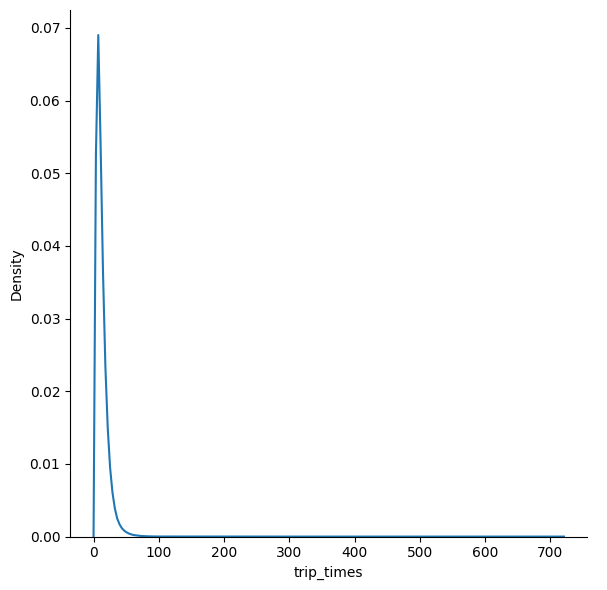

In [27]:
#pdf of trip-times after removing the outliers

sns.FacetGrid(frame_with_duration_mod, height=6)\
.map(sns.kdeplot,'trip_times')\
.add_legend()


plt.show()


In [28]:
# Convert 'value' column to its logarithm
frame_with_duration_mod['log_value'] = np.log(frame_with_duration_mod['trip_times'])



In [29]:
frame_with_duration_mod.columns

Index(['passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'total_amount', 'trip_times', 'pickup_times', 'speed', 'log_value'],
      dtype='object')

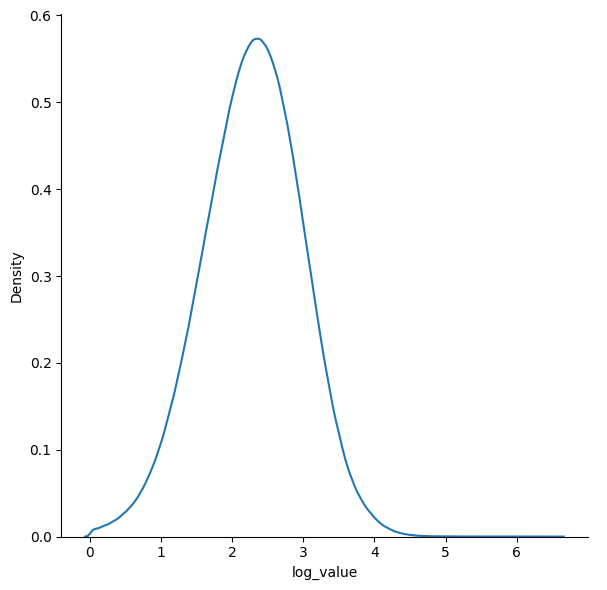

In [30]:
# pdf of log values

sns.FacetGrid(frame_with_duration_mod, height=6)\
.map(sns.kdeplot,'log_value')\
.add_legend()


plt.show()


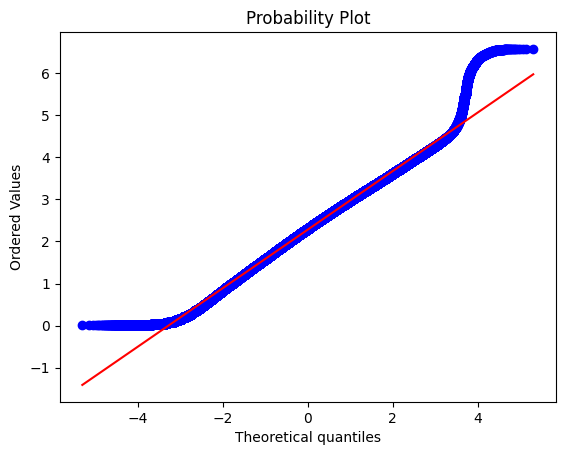

In [31]:
 
# plotting QQ plot for log_value
    
import matplotlib.pyplot as plt 
import scipy.stats as stats

data=frame_with_duration_mod['log_value']

stats.probplot(data,plot=plt)


plt.show()


In [32]:
frame_with_duration_mod.head(6)

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   
5                1           9.00        -73.874374        40.774048   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   
5         -73.986977         40.758194         40.33   20.216667   

   pickup_times      speed  log_value  
0    1421348739   5.285319   2.893146  
1    1420922018   9.983193   2.987364  
2    1420922018  10.746269   2.307573  
3    1420922019  16.071429   0.624154  
4    1420922019   9.318378   2.960968  
5    1420922019  26.710635   3.006507

### 4 Speed:

<Axes: ylabel='speed'>

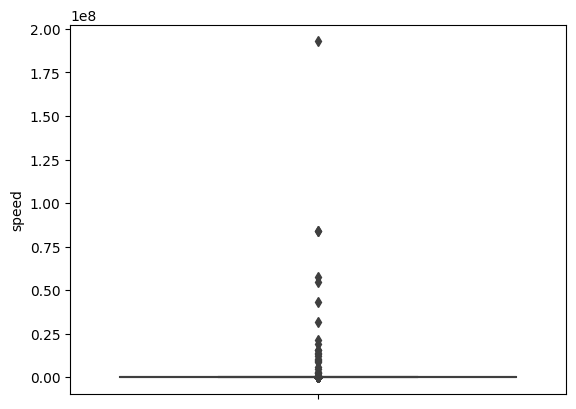

In [33]:
# box plot for speed

sns.boxplot(y='speed',data=frame_with_duration_mod)


In [34]:
# checking percentile value for outliers
var=frame_with_duration_mod['speed'].values
var_sorted=np.sort(var)
for i in range(0,100,10):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])




0 percent value is 0.0
10 percent value is 6.409495548961425
20 percent value is 7.80952380952381
30 percent value is 8.929133858267717
40 percent value is 9.98019801980198
50 percent value is 11.06865671641791
60 percent value is 12.286689419795222
70 percent value is 13.796407185628745
80 percent value is 15.963224893917962
90 percent value is 20.186915887850468
100 percentile value is  192857142.85714284


In [35]:
#gazing up from the 90th percentile



for i in range(90,100):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])


90 percent value is 20.186915887850468
91 percent value is 20.916454400875093
92 percent value is 21.752988047808763
93 percent value is 22.721893491124263
94 percent value is 23.844155844155843
95 percent value is 25.182552504038775
96 percent value is 26.80851063829787
97 percent value is 28.84304932735426
98 percent value is 31.591128254580514
99 percent value is 35.751350551136035
100 percentile value is  192857142.85714284


In [36]:

for i in np.arange(99,100.1,0.1):
    percent_value=np.percentile(var_sorted,i)
    print('{} percentile value is {}'.format(i,percent_value))


print(" 100 percentile value is", var_sorted[-1])


99.0 percentile value is 35.751350551136035
99.1 percentile value is 36.310812903766646
99.19999999999999 percentile value is 36.91470054446461
99.29999999999998 percentile value is 37.588235294117645
99.39999999999998 percentile value is 38.33033429478857
99.49999999999997 percentile value is 39.17580011612376
99.59999999999997 percentile value is 40.15384615384615
99.69999999999996 percentile value is 41.33802908679603
99.79999999999995 percentile value is 42.866243893092424
99.89999999999995 percentile value is 45.31067507472189
99.99999999999994 percentile value is 192857142.0460306
 100 percentile value is 192857142.85714284


In [37]:
frame_with_duration_mod=frame_with_duration_mod[(frame_with_duration_mod.speed>0)& (frame_with_duration_mod.speed<45.32)]

In [38]:

# CHECK AGAIN speed values

var=frame_with_duration_mod['speed'].values
var_sorted=np.sort(var)

for i in np.arange(99,100.1,0.1):
    percent_value=np.percentile(var_sorted,i)
    print('{} percentile value is {}'.format(i,percent_value))


print(" 100 percentile value is", var_sorted[-1])


99.0 percentile value is 35.23758984477593
99.1 percentile value is 35.76296460476154
99.19999999999999 percentile value is 36.32316906951008
99.29999999999998 percentile value is 36.92599234854998
99.39999999999998 percentile value is 37.6
99.49999999999997 percentile value is 38.34121075746827
99.59999999999997 percentile value is 39.18660287081339
99.69999999999996 percentile value is 40.164033587207754
99.79999999999995 percentile value is 41.34977287475665
99.89999999999995 percentile value is 42.87694318882999
99.99999999999994 percentile value is 45.31991951710261
 100 percentile value is 45.31991951710261


In [39]:
# avg speed of cab

sum(frame_with_duration_mod['speed'])/float(len(frame_with_duration_mod['speed']))

12.452427709734197

### 4 Trip distance:

<Axes: ylabel='trip_distance'>

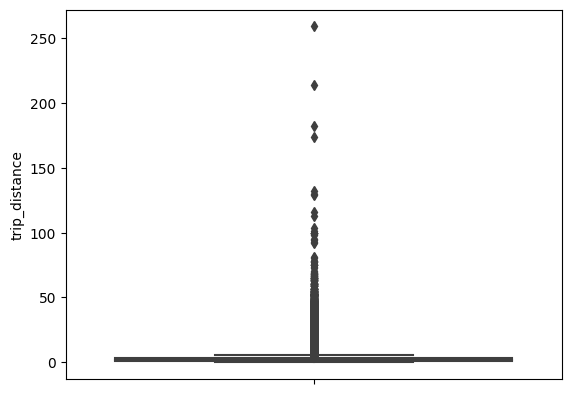

In [40]:
sns.boxplot(y='trip_distance',data=frame_with_duration_mod)


In [41]:
frame_with_duration_mod.head(6)

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   
5                1           9.00        -73.874374        40.774048   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   
5         -73.986977         40.758194         40.33   20.216667   

   pickup_times      speed  log_value  
0    1421348739   5.285319   2.893146  
1    1420922018   9.983193   2.987364  
2    1420922018  10.746269   2.307573  
3    1420922019  16.071429   0.624154  
4    1420922019   9.318378   2.960968  
5    1420922019  26.710635   3.006507

In [42]:
# checking percentile value for outliers
var=frame_with_duration_mod['trip_distance'].values
var_sorted=np.sort(var)
for i in range(0,100,10):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])




0 percent value is 0.01
10 percent value is 0.67
20 percent value is 0.9
30 percent value is 1.1
40 percent value is 1.39
50 percent value is 1.7
60 percent value is 2.08
70 percent value is 2.61
80 percent value is 3.6
90 percent value is 5.98
100 percentile value is  258.9


In [43]:
#gazing up from the 90th percentile



for i in range(90,100):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])


90 percent value is 5.98
91 percent value is 6.47
92 percent value is 7.09
93 percent value is 7.87
94 percent value is 8.74
95 percent value is 9.6
96 percent value is 10.6
97 percent value is 12.1
98 percent value is 16.07
99 percent value is 18.18
100 percentile value is  258.9


In [44]:

for i in np.arange(99,100.1,0.1):
    percent_value=np.percentile(var_sorted,i)
    print('{} percentile value is {}'.format(i,percent_value))


print(" 100 percentile value is", var_sorted[-1])


99.0 percentile value is 18.18
99.1 percentile value is 18.37
99.19999999999999 percentile value is 18.6
99.29999999999998 percentile value is 18.84
99.39999999999998 percentile value is 19.14
99.49999999999997 percentile value is 19.5
99.59999999999997 percentile value is 19.97
99.69999999999996 percentile value is 20.51
99.79999999999995 percentile value is 21.23
99.89999999999995 percentile value is 22.58
99.99999999999994 percentile value is 258.89999966248865
 100 percentile value is 258.9


In [45]:
#removing further outliers based on the 99.9th percentile value

#frame_with_duration_mod=frame_with_duration_mod[(frame_with_duration_mod.speed>0)& (frame_with_duration_mod.speed<45.32)]
frame_with_duration_mod=frame_with_duration_mod[(frame_with_duration_mod.trip_distance>0)& (frame_with_duration_mod.trip_distance<23)]

In [46]:

# CHECK AGAIN speed values

var=frame_with_duration_mod['trip_distance'].values
var_sorted=np.sort(var)

for i in np.arange(99,100.1,0.1):
    percent_value=np.percentile(var_sorted,i)
    print('{} percentile value is {}'.format(i,percent_value))


print(" 100 percentile value is", var_sorted[-1])


99.0 percentile value is 18.0
99.1 percentile value is 18.2
99.19999999999999 percentile value is 18.4
99.29999999999998 percentile value is 18.6
99.39999999999998 percentile value is 18.9
99.49999999999997 percentile value is 19.2
99.59999999999997 percentile value is 19.56
99.69999999999996 percentile value is 20.01
99.79999999999995 percentile value is 20.6
99.89999999999995 percentile value is 21.34
99.99999999999994 percentile value is 22.99
 100 percentile value is 22.99


<Axes: ylabel='trip_distance'>

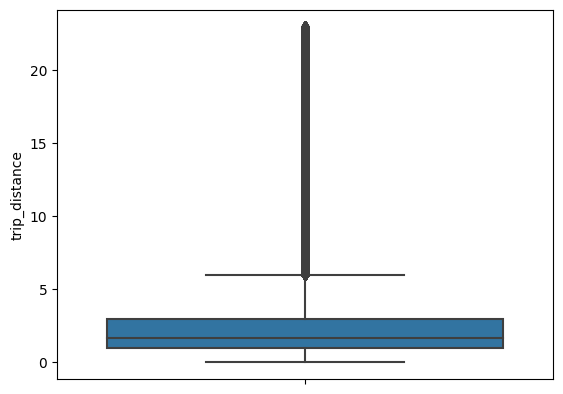

In [47]:
# box plot after removing outlier
sns.boxplot(y='trip_distance',data=frame_with_duration_mod)


### 5. Total Fare

In [48]:
frame_with_duration_mod.head(5)

passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   

   pickup_times      speed  log_value  
0    1421348739   5.285319   2.893146  
1    1420922018   9.983193   2.987364  
2    1420922018  10.746269   2.307573  
3    1420922019  16.071429   0.624154  
4    1420922019   9.318378   2.960968

<Axes: ylabel='total_amount'>

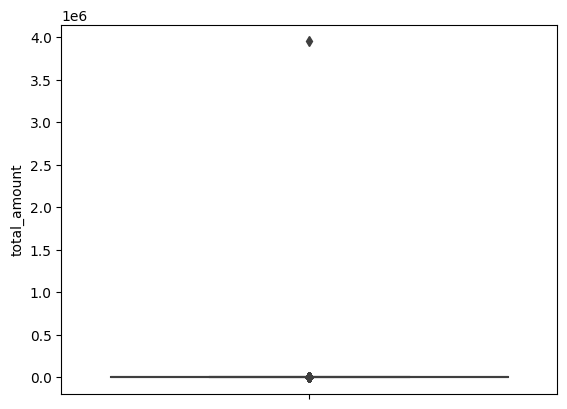

In [49]:
sns.boxplot(y='total_amount',data=frame_with_duration_mod)


In [50]:
# checking percentile value for outliers
var=frame_with_duration_mod['total_amount'].values
var_sorted=np.sort(var)
for i in range(0,100,10):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])




0 percent value is -242.55
10 percent value is 6.35
20 percent value is 7.8
30 percent value is 8.8
40 percent value is 9.8
50 percent value is 11.16
60 percent value is 12.8
70 percent value is 14.8
80 percent value is 18.3
90 percent value is 25.8
100 percentile value is  3950611.6


In [51]:
#gazing up from the 90th percentile



for i in range(90,100):
    percent_value=np.percentile(var_sorted,i)
    print("{} percent value is {}".format(i,percent_value))
print("100 percentile value is ", var_sorted[-1])


90 percent value is 25.8
91 percent value is 27.3
92 percent value is 29.13
93 percent value is 31.55
94 percent value is 34.63
95 percent value is 38.13
96 percent value is 42.13
97 percent value is 47.53
98 percent value is 57.73
99 percent value is 65.8
100 percentile value is  3950611.6


In [52]:

for i in np.arange(99,100.1,0.1):
    percent_value=np.percentile(var_sorted,i)
    print('{} percentile value is {}'.format(i,percent_value))


print(" 100 percentile value is", var_sorted[-1])


99.0 percentile value is 65.8
99.1 percentile value is 67.56
99.19999999999999 percentile value is 68.81
99.29999999999998 percentile value is 69.6
99.39999999999998 percentile value is 69.73
99.49999999999997 percentile value is 69.73
99.59999999999997 percentile value is 69.76
99.69999999999996 percentile value is 72.46
99.79999999999995 percentile value is 75.16
99.89999999999995 percentile value is 86.6
99.99999999999994 percentile value is 3950611.5705955215
 100 percentile value is 3950611.6


***OBSV***   It seems that even the 99.9th percentile value is not an outlier. Now we will plot some graphs

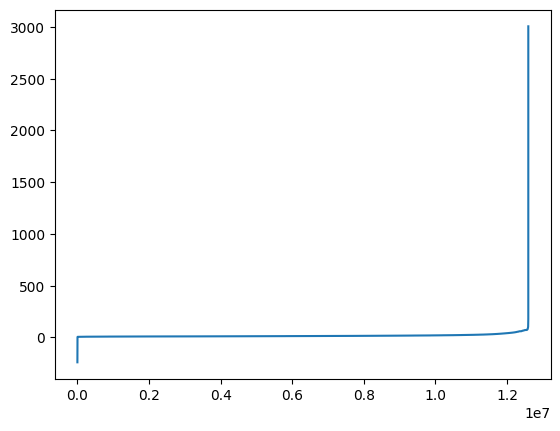

In [53]:
plt.plot(var_sorted[:-2])

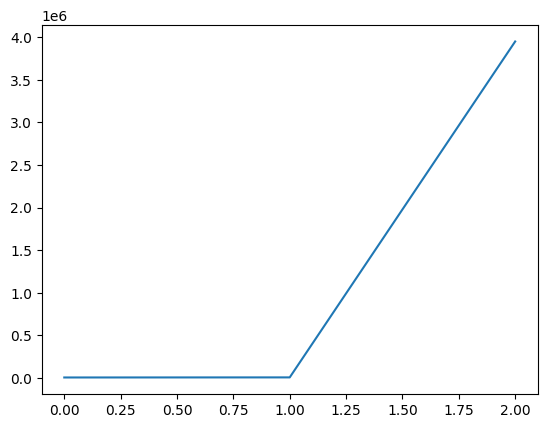

In [54]:
plt.plot(var_sorted[-3:])

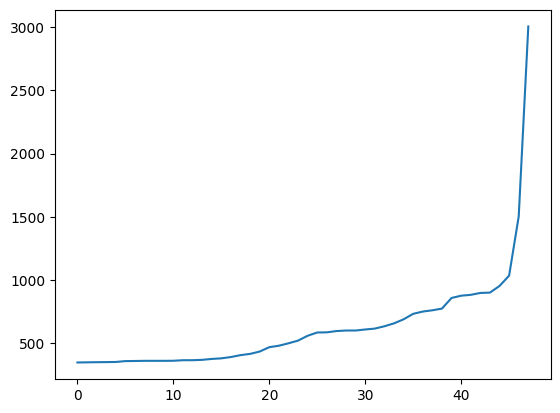

In [55]:
plt.plot(var_sorted[-50:-2])

In [56]:
# we can use  elbow method we can use 1000 as threshold for outlier removal

In [57]:
# remove all outlier using our univariate anlysis

In [58]:
def remove_outliers(new_frame):
    a=new_frame.shape[0]
    print('Number of pickup records= ',a)

    temp_frame=new_frame[((new_frame.dropoff_longitude>=-74.15)& (new_frame.dropoff_longitude<=-73.7004)&\
        (new_frame.dropoff_latitude>=-40.5774)& (new_frame.dropoff_latitude<=40.9176)&\
        (new_frame.pickup_longitude>=-74.15)& (new_frame.pickup_latitude>=40.5774)& \
        (new_frame.pickup_longitude<=-73.7004)& (new_frame.pickup_latitude<=40.9176))]
    b=temp_frame.shape[0]

    print('Number of outliers coordinates lying outside NY boundaries:',(a-b))


    temp_frame=new_frame[(new_frame.trip_times<720)& (new_frame.trip_times>0)]
    c=temp_frame.shape[0]

    print('Number of outliers from trip_times analysis : ', (a-c))

    temp_frame=new_frame[(new_frame.trip_distance<23) & (new_frame.trip_distance>0)]
    d=temp_frame.shape[0]
    print('Number of outliers from trip_distance analysis: ', (a-d))

    temp_frame=new_frame[(new_frame.speed<65)& (new_frame.speed>0)]
    e=temp_frame.shape[0]
    print('Number of outliers from speed analysis: ', (a-e))

    temp_frame=new_frame[(new_frame.total_amount<1000)& (new_frame.total_amount>0)]
    f=temp_frame.shape[0]
    print('Number of outliers from fare analysis: ', (a-f))


    new_frame=new_frame[((new_frame.dropoff_longitude>=-74.15)& (new_frame.dropoff_longitude<=-73.7004)&\
        (new_frame.dropoff_latitude>=-40.5774)& (new_frame.dropoff_latitude<=40.9176)&\
        (new_frame.pickup_longitude>=-74.15)& (new_frame.pickup_latitude>=40.5774)& \
        (new_frame.pickup_longitude<=-73.7004)& (new_frame.pickup_latitude<=40.9176))]



#    new_frame=new_frame([(new_frame.trip_times>0)& (new_frame.trip_times<720)])
    new_frame=new_frame[(new_frame.trip_times<720)& (new_frame.trip_times>0)]



    new_frame=new_frame[(new_frame.trip_distance<23) & (new_frame.trip_distance>0)]

    new_frame=new_frame[(new_frame.speed<65)& (new_frame.speed>0)]

    new_frame=new_frame[(new_frame.total_amount<1000)& (new_frame.total_amount>0)]

    print ('total outlier removed', a-new_frame.shape[0])

    print ('*'* 100)
    
    return new_frame



In [59]:
print('removing outliers in the month of Jan-2015')

print ('*'* 100)

frame_with_durations_outliers_removed=remove_outliers(frame_with_durations)

print('fraction of data points that remain after removing outliers',\
    float(len(frame_with_durations_outliers_removed))/len(frame_with_durations))

removing outliers in the month of Jan-2015
****************************************************************************************************
Number of pickup records=  12748986
Number of outliers coordinates lying outside NY boundaries: 292506
Number of outliers from trip_times analysis :  23889
Number of outliers from trip_distance analysis:  92597
Number of outliers from speed analysis:  89613
Number of outliers from fare analysis:  5275
total outlier removed 367378
****************************************************************************************************
fraction of data points that remain after removing outliers 0.9711837474760738


In [63]:
# this is test

In [64]:
# trying diffrent clusters to find right k in k-means

In [61]:
coords = frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']]
neighbours = []

def find_min_distance(cluster_centers, cluster_len):
    nice_points = 0
    wrong_points = 0
    less2 = []
    more2 = []
    min_dist = 1000
    for i in range(0, cluster_len):
        nice_points = 0
        wrong_points = 0
        for j in range(0, cluster_len):
            if i != j:
                distance = gpxpy.geo.haversine_distance(cluster_centers[i][0], cluster_centers[i][1], cluster_centers[j][0], cluster_centers[j][1])
                min_dist = min(min_dist, distance / (1.6 * 1000))
                if (distance / (1.6 * 1000)) <= 2:
                    nice_points += 1
                else:
                    wrong_points += 1
        less2.append(nice_points)
        more2.append(wrong_points)
    neighbours.append(less2)

    print("On choosing a cluster size of ", cluster_len, "\nAvg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2):", np.ceil(sum(less2) / len(less2)), "\nAvg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2):", np.ceil(sum(more2) / len(more2)), "\nMin inter-cluster distance = ", min_dist, "\n---")

    
    
    

def find_clusters(increment):
    kmeans=MiniBatchKMeans(n_clusters=increment,batch_size=10000,random_state=42).fit(coords)
    frame_with_durations_outliers_removed['pickup_cluster']=kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude','pickup_longitude']])
    cluster_centers=kmeans.cluster_centers_
    cluster_len=len(cluster_centers)
    return cluster_centers,cluster_len


for increment in range(10,100,10):
    cluster_centers,cluster_len=find_clusters(increment)
    find_min_distance(cluster_centers,cluster_len)

On choosing a cluster size of  10 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 2.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 8.0 
Min inter-cluster distance =  0.8393961871055484 
---
On choosing a cluster size of  20 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 4.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 15.0 
Min inter-cluster distance =  0.6463849701800324 
---
On choosing a cluster size of  30 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 9.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 21.0 
Min inter-cluster distance =  0.4425913695109061 
---
On choosing a cluster size of  40 
Avg. Number of Clusters within the vicinity (i.e. intercluster-distance < 2): 11.0 
Avg. Number of Clusters outside the vicinity (i.e. intercluster-distance > 2): 29.0 
Min inter-cluster distance

In [65]:


kmeans=MiniBatchKMeans(n_clusters=40,batch_size=10000,random_state=0).fit(coords)
frame_with_durations_outliers_removed['pickup_cluster']=kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude','pickup_longitude']])

In [79]:

# Plotting the cluster centers on OSM

cluster_centers=kmeans.cluster_centers_
cluster_len=len(cluster_centers)
map_osm=folium.Map(location=[40.734695, -73.990372])
for i in range(cluster_len):

    folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])),popup=(str(cluster_centers[i][0])+str(cluster_centers[i][1]))).add_to(map_osm)              
    #folium.Marker(list((cluster_centers[i][0],cluster_centers[i][1])),popup=(str(cluster_centers[i][0]+str(cluster_centers[i][1]))).add_to(map_osm)
map_osm

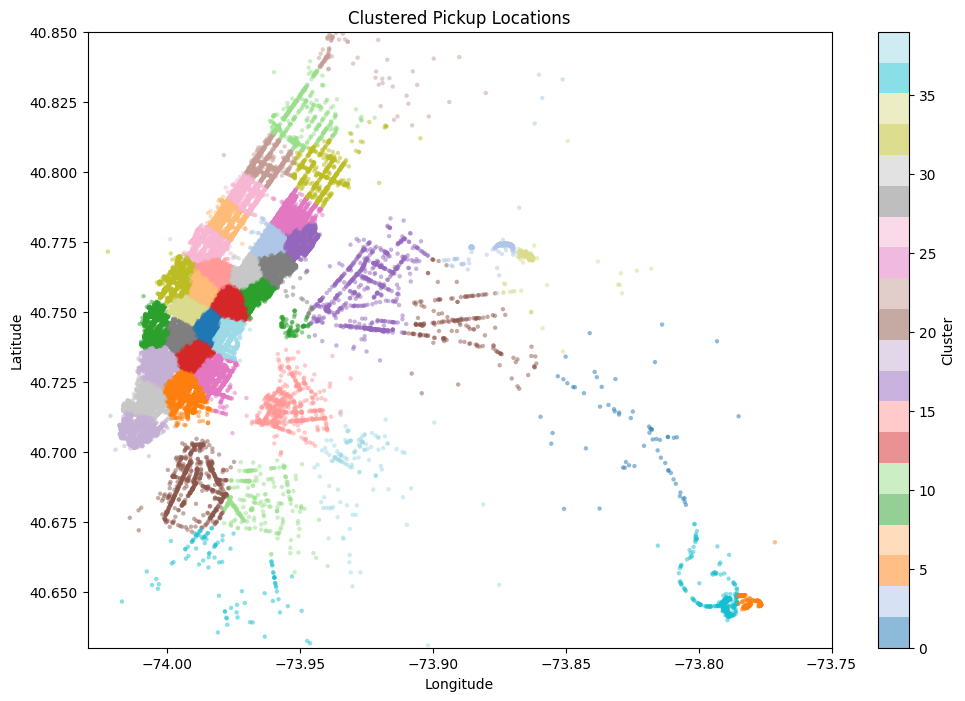

In [82]:
# plotting clusters
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(frame_with_durations_outliers_removed.pickup_longitude.values[:100000], 
                     frame_with_durations_outliers_removed.pickup_latitude.values[:100000], 
                     s=10, lw=0, c=frame_with_durations_outliers_removed.pickup_cluster.values[:100000], 
                     cmap='tab20', alpha=0.5)

ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Clustered Pickup Locations')
fig.colorbar(scatter, ax=ax, label='Cluster')

plt.show()


In [83]:
def add_pickup_bins(frame,month,year):
    unix_pickup_times=[i for i in frame['pickup_times'].values]
    unix_times = [[1420070400,1422748800,1425168000,1427846400,1430438400,1433116800],\
                    [1451606400,1454284800,1456790400,1459468800,1462060800,1464739200]]
    
    start_pickup_unix=unix_times[year-2015][month-1]
    # https://www.timeanddate.com/time/zones/est
    # (int((i-start_pickup_unix)/600)+33) : our unix time is in gmt to we are converting it to est
    tenminutewise_binned_unix_pickup_times=[(int((i-start_pickup_unix)/600)+33) for i in unix_pickup_times]
    frame['pickup_bins'] = np.array(tenminutewise_binned_unix_pickup_times)
    return frame

In [84]:
# clustering, making pickup bins and grouping by pickup cluster and pickup bins
frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
jan_2015_frame = add_pickup_bins(frame_with_durations_outliers_removed,1,2015)
jan_2015_groupby = jan_2015_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()

In [85]:
jan_2015_frame.head()


passenger_count  trip_distance  pickup_longitude  pickup_latitude  \
0                1           1.59        -73.993896        40.750111   
1                1           3.30        -74.001648        40.724243   
2                1           1.80        -73.963341        40.802788   
3                1           0.50        -74.009087        40.713818   
4                1           3.00        -73.971176        40.762428   

   dropoff_longitude  dropoff_latitude  total_amount  trip_times  \
0         -73.974785         40.750618         17.05   18.050000   
1         -73.994415         40.759109         17.80   19.833333   
2         -73.951820         40.824413         10.80   10.050000   
3         -74.004326         40.719986          4.80    1.866667   
4         -74.004181         40.742653         16.30   19.316667   

   pickup_times      speed  pickup_cluster  pickup_bins  
0    1421348739   5.285319              35         2163  
1    1420922018   9.983193              19         1452  
2    1420922018  10.746269              22         1452  
3    1420922019  16.071429              30         1452  
4    1420922019   9.318378              31         1452

In [86]:
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              33                      93
               34                     213
               35                     263
               36                     297
               37                     262

In [87]:
jan_2015_groupby.head()

trip_distance
pickup_cluster pickup_bins               
0              33                      93
               34                     213
               35                     263
               36                     297
               37                     262

In [93]:

start_time = time.time()

def datapreparation(month,kmeans,month_no,year_no):
    
    print ("Return with trip times..")

    frame_with_durations = return_with_trip_times(month)
    
    print ("Remove outliers..")
    frame_with_durations_outliers_removed = remove_outliers(frame_with_durations)
    
    print ("Estimating clusters..")
    frame_with_durations_outliers_removed['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed[['pickup_latitude', 'pickup_longitude']])
    #frame_with_durations_outliers_removed_2016['pickup_cluster'] = kmeans.predict(frame_with_durations_outliers_removed_2016[['pickup_latitude', 'pickup_longitude']])

    print ("Final groupbying..")
    final_updated_frame = add_pickup_bins(frame_with_durations_outliers_removed,month_no,year_no)
    final_groupby_frame = final_updated_frame[['pickup_cluster','pickup_bins','trip_distance']].groupby(['pickup_cluster','pickup_bins']).count()
    
    return final_updated_frame,final_groupby_frame

month_jan_2016 = dd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-01.csv')
month_feb_2016 = dd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-02.csv')
month_mar_2016 = dd.read_csv('/kaggle/input/nyc-yellow-taxi-trip-data/yellow_tripdata_2016-03.csv')

jan_2016_frame,jan_2016_groupby = datapreparation(month_jan_2016,kmeans,1,2016)
print("January 2016 data preparation completed.")

feb_2016_frame,feb_2016_groupby = datapreparation(month_feb_2016,kmeans,2,2016)
print("February 2016 data preparation completed.")

mar_2016_frame,mar_2016_groupby = datapreparation(month_mar_2016,kmeans,3,2016)
print("March 2016 data preparation completed.")

end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")


Return with trip times..
Remove outliers..
Number of pickup records=  10906858
Number of outliers coordinates lying outside NY boundaries: 213358
Number of outliers from trip_times analysis :  27190
Number of outliers from trip_distance analysis:  79742
Number of outliers from speed analysis:  74049
Number of outliers from fare analysis:  4991
total outlier removed 289548
****************************************************************************************************
Estimating clusters..
Final groupbying..
January 2016 data preparation completed.
Return with trip times..
Remove outliers..
Number of pickup records=  11382049
Number of outliers coordinates lying outside NY boundaries: 221794
Number of outliers from trip_times analysis :  27670
Number of outliers from trip_distance analysis:  81902
Number of outliers from speed analysis:  78150
Number of outliers from fare analysis:  5476
total outlier removed 300126
*******************************************************************

In [94]:
# smothing

In [95]:
def return_unq_pickup_bins(frame):
    values=[]
    for i in range (0,40):
        new=frame[frame['pickup_cluster']==i]
        list_unq=list(set(new['pickup_bins']))
        list_unq.sort()
        values.append(list_unq)
    return values


In [96]:
# for every month we get all indices of 10min intravels in which atleast one pickup got happened

#jan
jan_2015_unique = return_unq_pickup_bins(jan_2015_frame)
jan_2016_unique = return_unq_pickup_bins(jan_2016_frame)

#feb
feb_2016_unique = return_unq_pickup_bins(feb_2016_frame)

#march
mar_2016_unique = return_unq_pickup_bins(mar_2016_frame)

In [97]:
# for each cluster number of 10min intravels with 0 pickups
for i in range(40):
    print("for the ",i,"th cluster number of 10min intavels with zero pickups: ",4464 - len(set(jan_2015_unique[i])))
    print('-'*60)

for the  0 th cluster number of 10min intavels with zero pickups:  37
------------------------------------------------------------
for the  1 th cluster number of 10min intavels with zero pickups:  895
------------------------------------------------------------
for the  2 th cluster number of 10min intavels with zero pickups:  43
------------------------------------------------------------
for the  3 th cluster number of 10min intavels with zero pickups:  592
------------------------------------------------------------
for the  4 th cluster number of 10min intavels with zero pickups:  29
------------------------------------------------------------
for the  5 th cluster number of 10min intavels with zero pickups:  181
------------------------------------------------------------
for the  6 th cluster number of 10min intavels with zero pickups:  41
------------------------------------------------------------
for the  7 th cluster number of 10min intavels with zero pickups:  29
----------

In [98]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add 0 to the smoothed data
# we finally return smoothed data
def fill_missing(count_values,values):
    smoothed_regions=[]
    ind=0
    for r in range(0,40):
        smoothed_bins=[]
        for i in range(4464):
            if i in values[r]:
                smoothed_bins.append(count_values[ind])
                ind+=1
            else:
                smoothed_bins.append(0)
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions

In [99]:
# Fills a value of zero for every bin where no pickup data is present 
# the count_values: number pickps that are happened in each region for each 10min intravel
# there wont be any value if there are no picksups.
# values: number of unique bins

# for every 10min intravel(pickup_bin) we will check it is there in our unique bin,
# if it is there we will add the count_values[index] to smoothed data
# if not we add smoothed data (which is calculated based on the methods that are discussed in the above markdown cell)
# we finally return smoothed data
def smoothing(count_values,values):
    smoothed_regions=[] # stores list of final smoothed values of each reigion
    ind=0
    repeat=0 
    smoothed_value=0
    for r in range(0,40):
        smoothed_bins=[] #stores the final smoothed values
        repeat=0
        for i in range(4464):
            if repeat!=0: # prevents iteration for a value which is already visited/resolved
                repeat-=1
                continue
            if i in values[r]: #checks if the pickup-bin exists 
                smoothed_bins.append(count_values[ind]) # appends the value of the pickup bin if it exists
            else:
                if i!=0:
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]: #searches for the left-limit or the pickup-bin value which has a pickup value
                            continue
                        else:
                            right_hand_limit=j
                            break
                    if right_hand_limit==0:
                    #Case 1: When we have the last/last few values are found to be missing,hence we have no right-limit here
                        smoothed_value=count_values[ind-1]*1.0/((4463-i)+2)*1.0                               
                        for j in range(i,4464):                              
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(4463-i)
                        ind-=1
                    else:
                    #Case 2: When we have the missing values between two known values
                        smoothed_value=(count_values[ind-1]+count_values[ind])*1.0/((right_hand_limit-i)+2)*1.0             
                        for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                        smoothed_bins[i-1] = math.ceil(smoothed_value)
                        repeat=(right_hand_limit-i)
                else:
                    #Case 3: When we have the first/first few values are found to be missing,hence we have no left-limit here
                    right_hand_limit=0
                    for j in range(i,4464):
                        if  j not in values[r]:
                            continue
                        else:
                            right_hand_limit=j
                            break
                    smoothed_value=count_values[ind]*1.0/((right_hand_limit-i)+1)*1.0
                    for j in range(i,right_hand_limit+1):
                            smoothed_bins.append(math.ceil(smoothed_value))
                    repeat=(right_hand_limit-i)
            ind+=1
        smoothed_regions.extend(smoothed_bins)
    return smoothed_regions


In [100]:
#Filling Missing values of Jan-2015 with 0
# here in jan_2015_groupby dataframe the trip_distance represents the number of pickups that are happened
jan_2015_fill = fill_missing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

#Smoothing Missing values of Jan-2015
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)

In [101]:
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*30*60/10 = 4320
# for each cluster we will have 4464 values, therefore 40*4464 = 178560 (length of the jan_2015_fill)
print("number of 10min intravels among all the clusters ",len(jan_2015_fill))

number of 10min intravels among all the clusters  178560


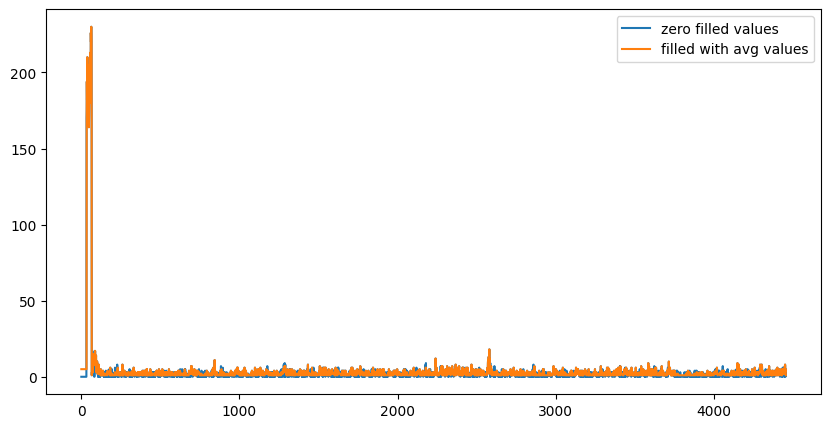

In [102]:
# Smoothing vs Filling
# sample plot that shows two variations of filling missing values
# we have taken the number of pickups for cluster region 2
plt.figure(figsize=(10,5))
plt.plot(jan_2015_fill[4464:8920], label="zero filled values")
plt.plot(jan_2015_smooth[4464:8920], label="filled with avg values")
plt.legend()
plt.show()

In [103]:
# Jan-2015 data is smoothed, Jan,Feb & March 2016 data missing values are filled with zero
jan_2015_smooth = smoothing(jan_2015_groupby['trip_distance'].values,jan_2015_unique)
jan_2016_smooth = fill_missing(jan_2016_groupby['trip_distance'].values,jan_2016_unique)
feb_2016_smooth = fill_missing(feb_2016_groupby['trip_distance'].values,feb_2016_unique)
mar_2016_smooth = fill_missing(mar_2016_groupby['trip_distance'].values,mar_2016_unique)

# Making list of all the values of pickup data in every bin for a period of 3 months and storing them region-wise 
regions_cum = []

# a =[1,2,3]
# b = [2,3,4]
# a+b = [1, 2, 3, 2, 3, 4]

# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

for i in range(0,40):
    regions_cum.append(jan_2016_smooth[4464*i:4464*(i+1)]+feb_2016_smooth[4176*i:4176*(i+1)]+mar_2016_smooth[4464*i:4464*(i+1)])

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 13104

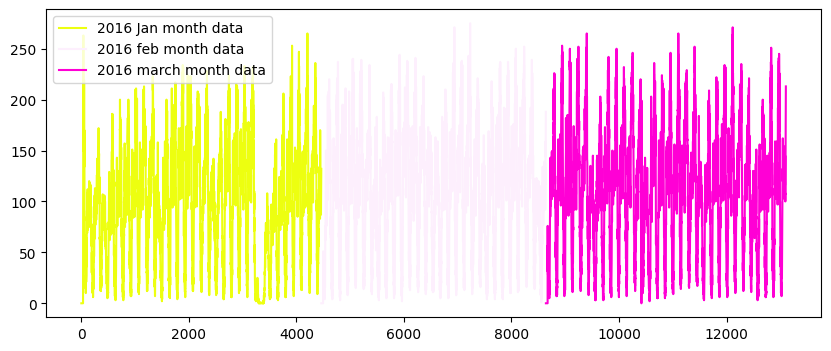

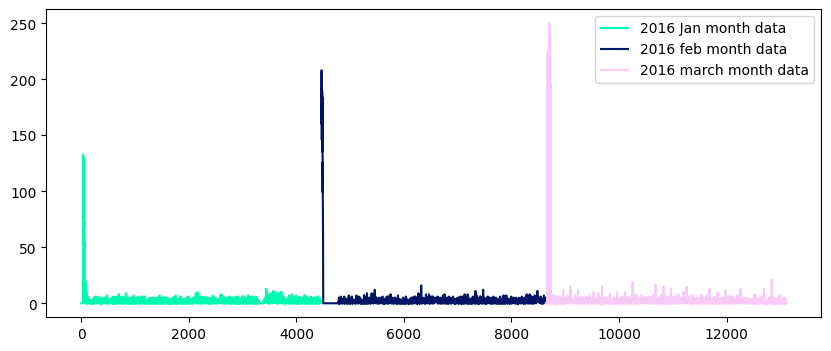

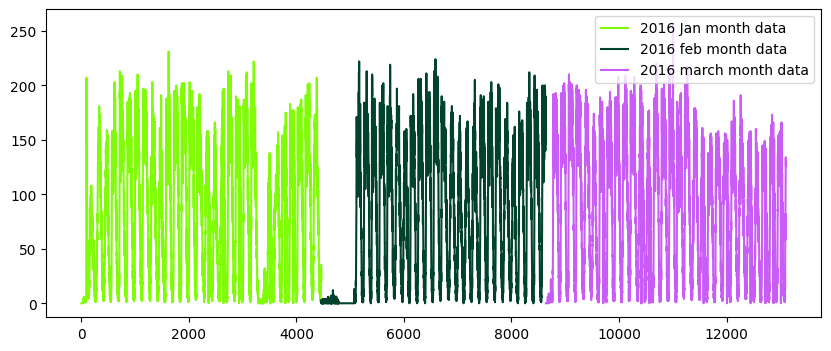

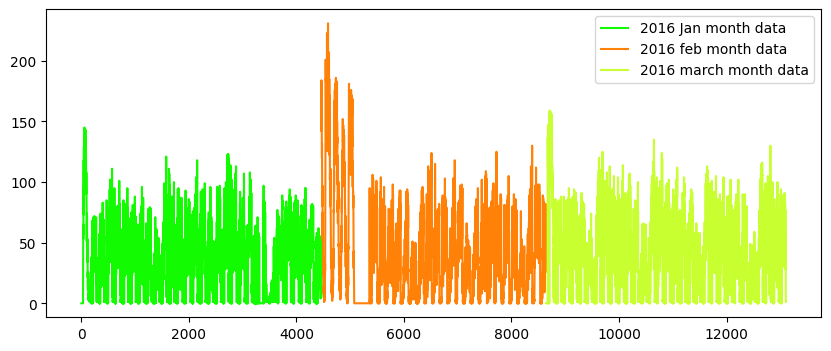

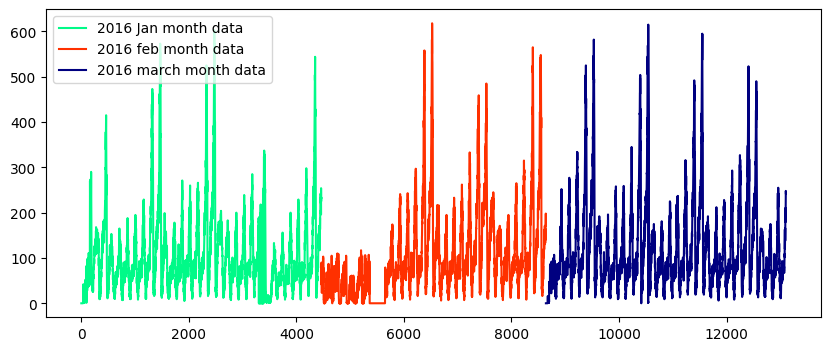

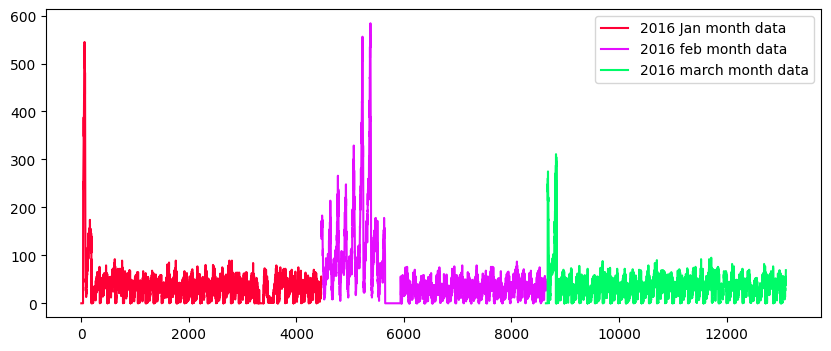

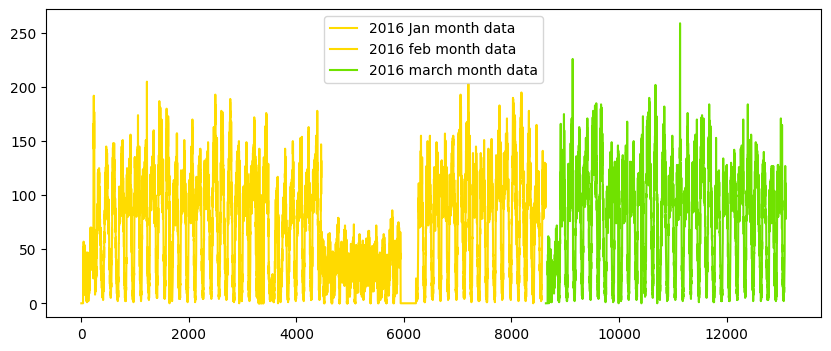

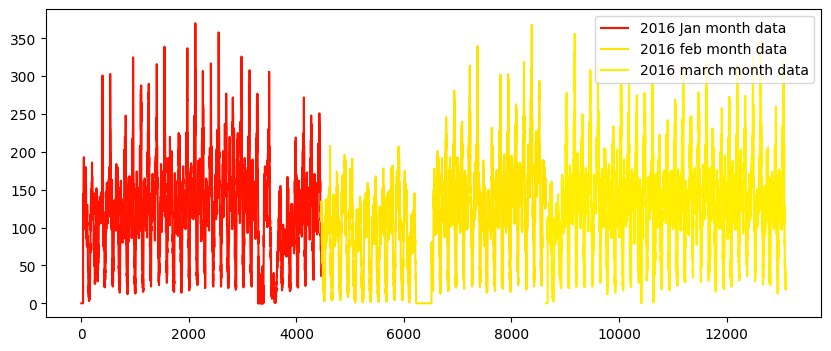

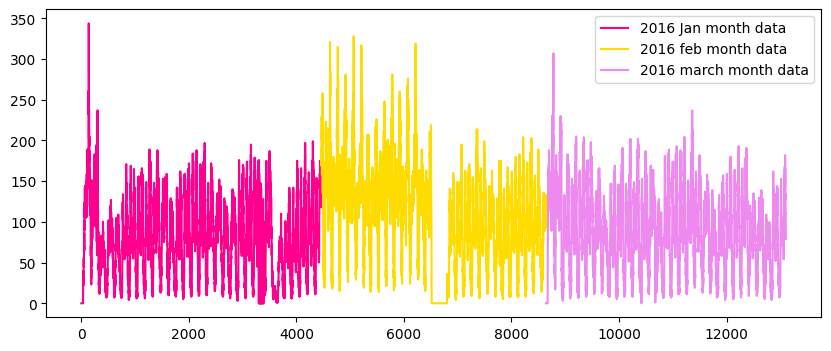

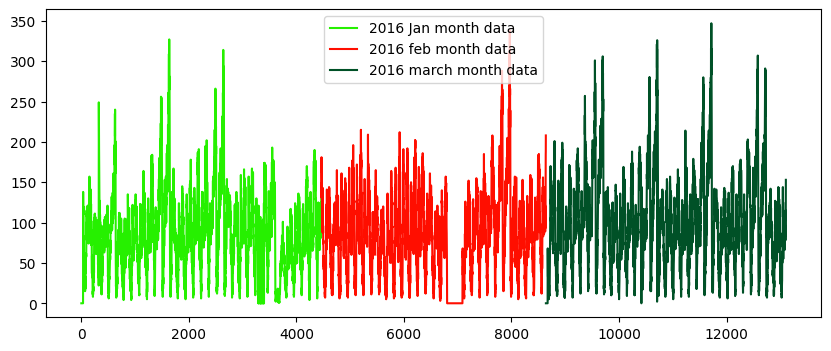

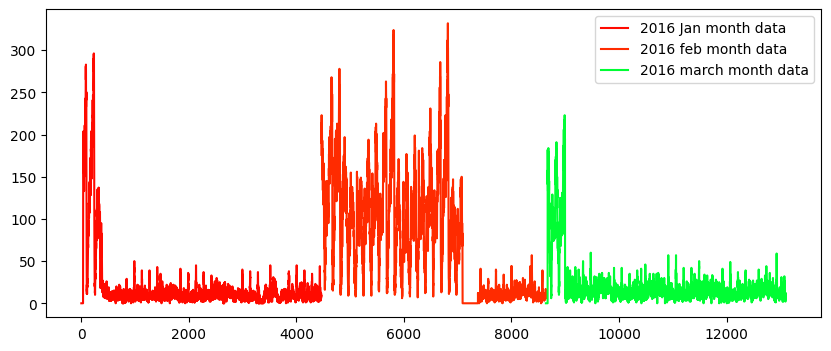

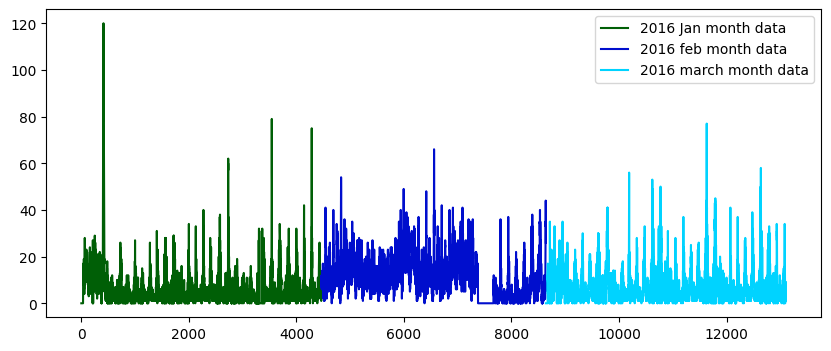

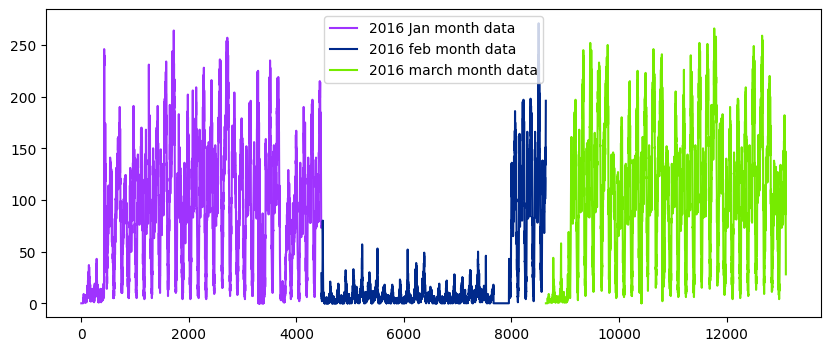

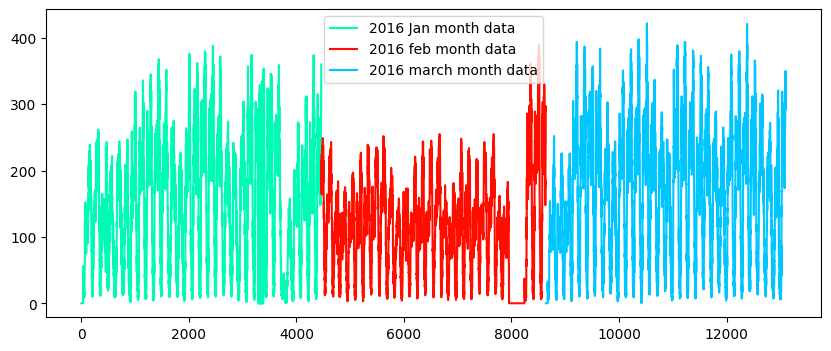

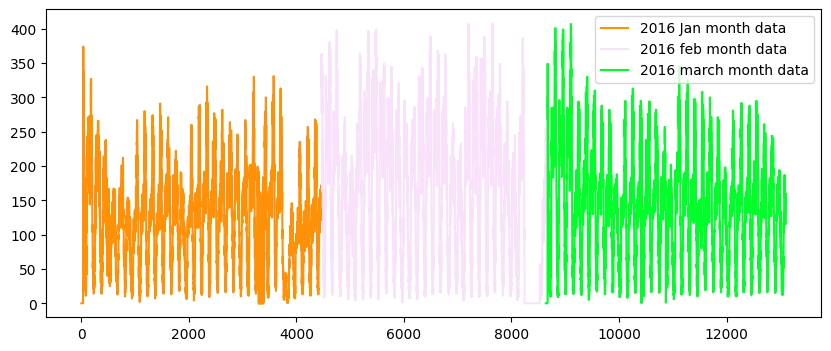

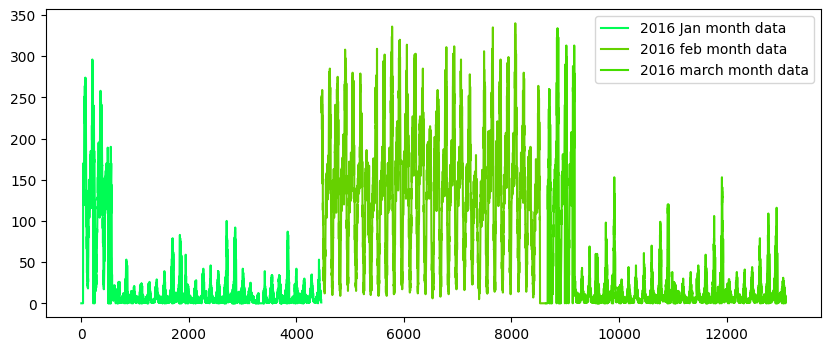

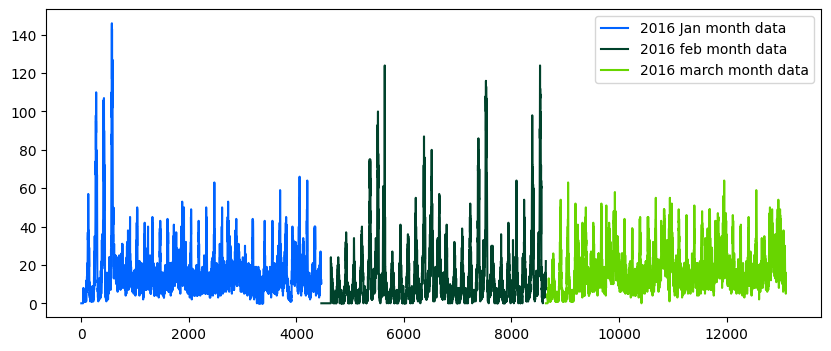

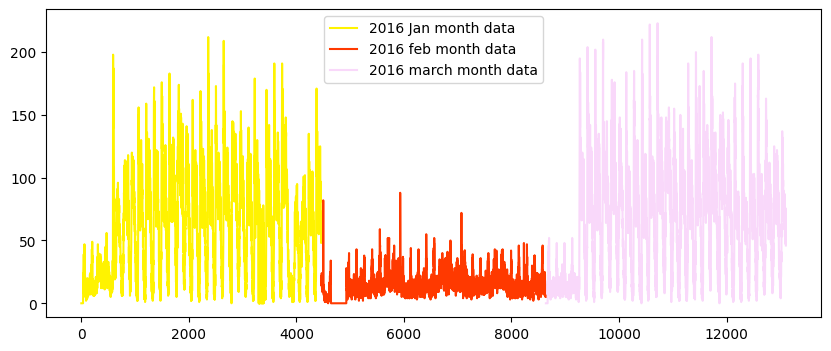

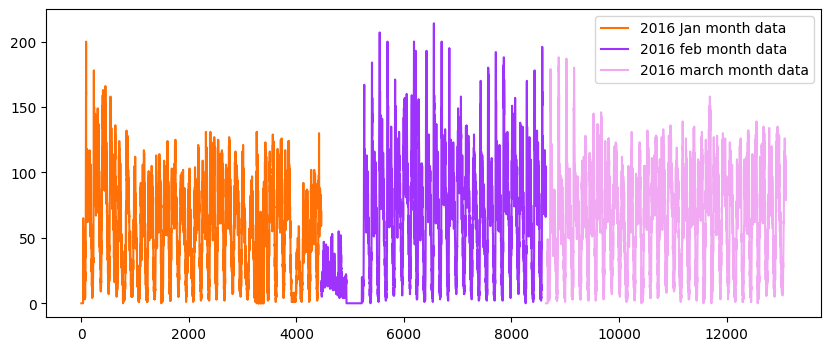

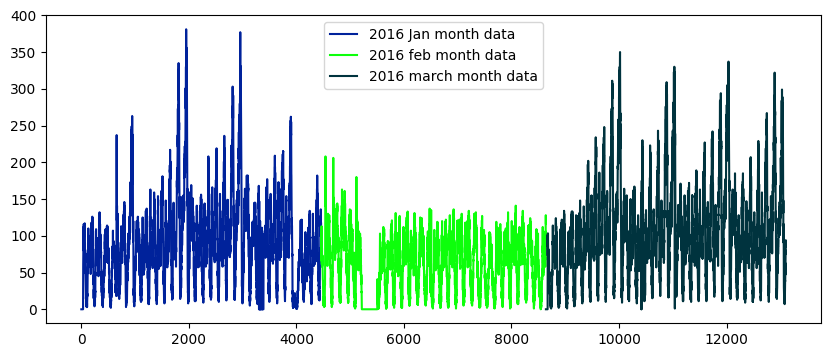

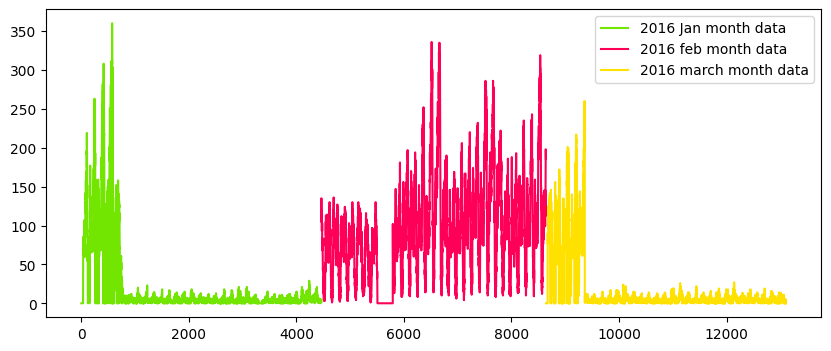

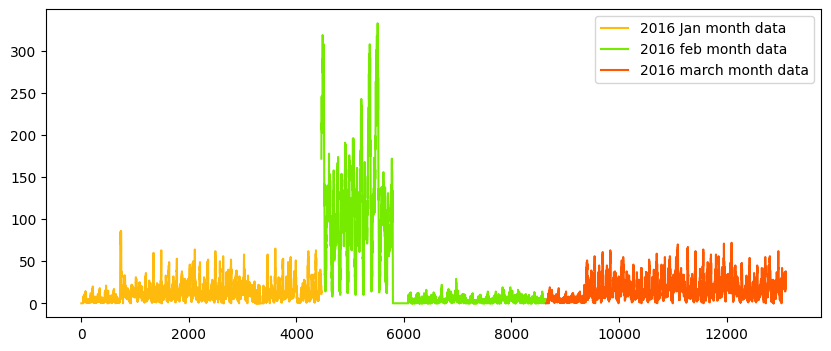

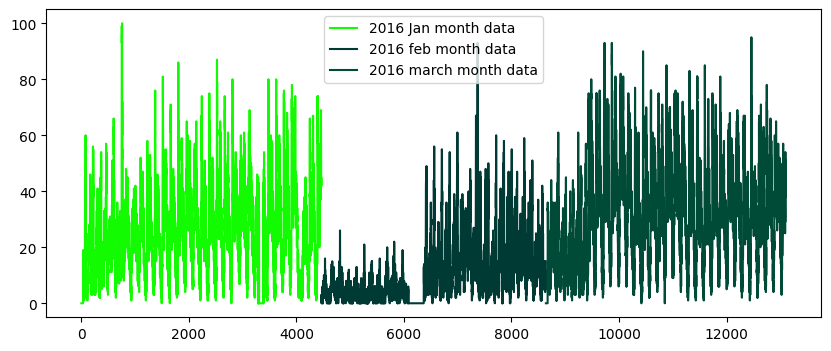

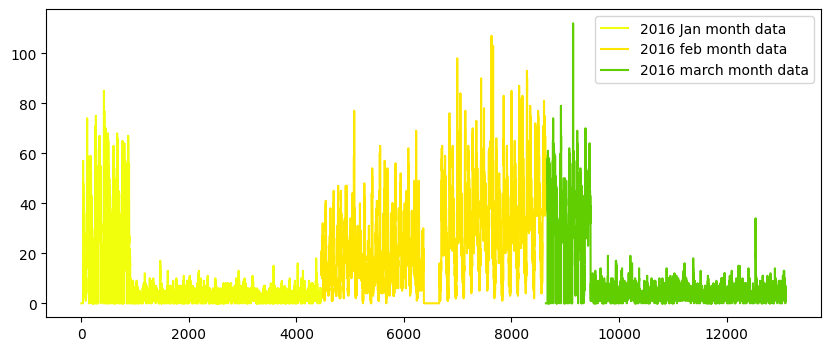

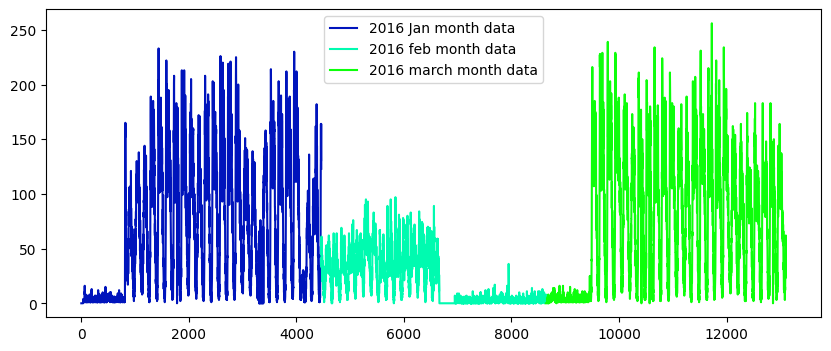

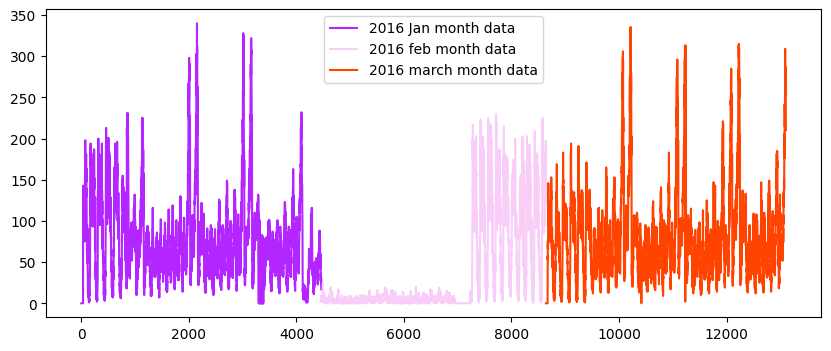

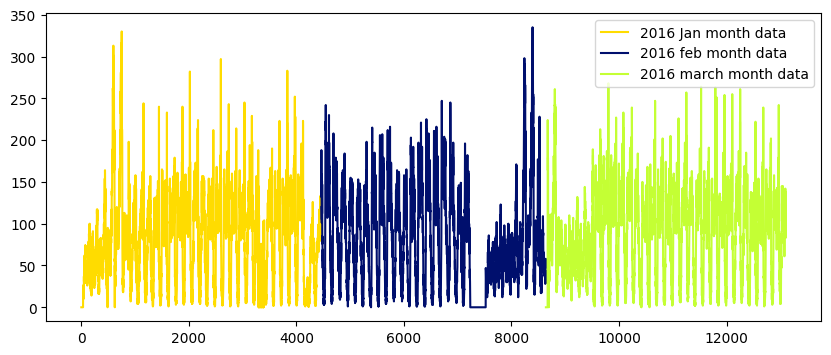

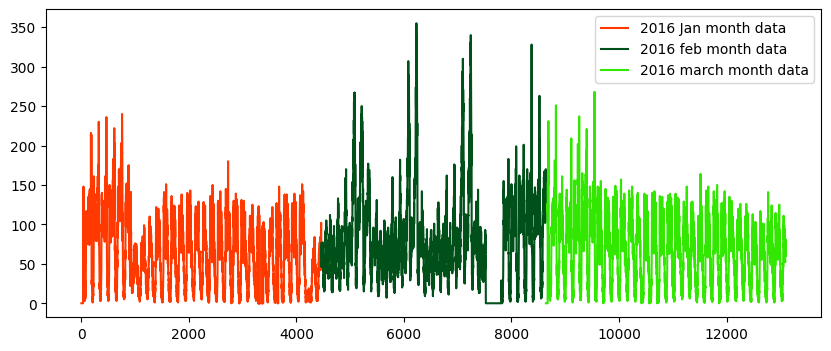

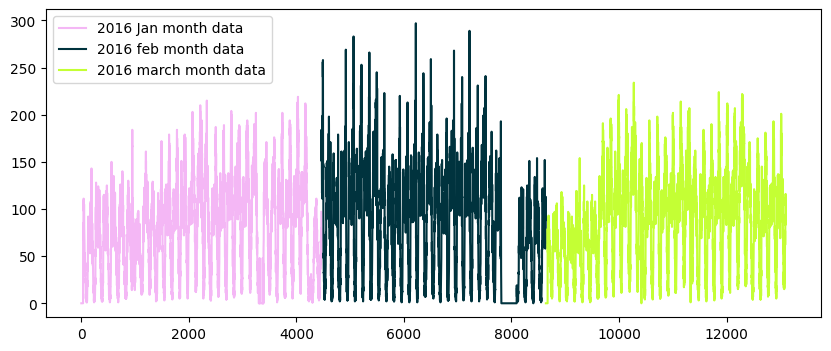

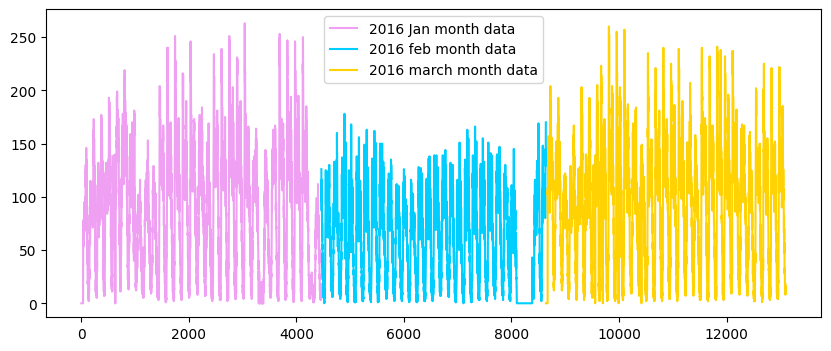

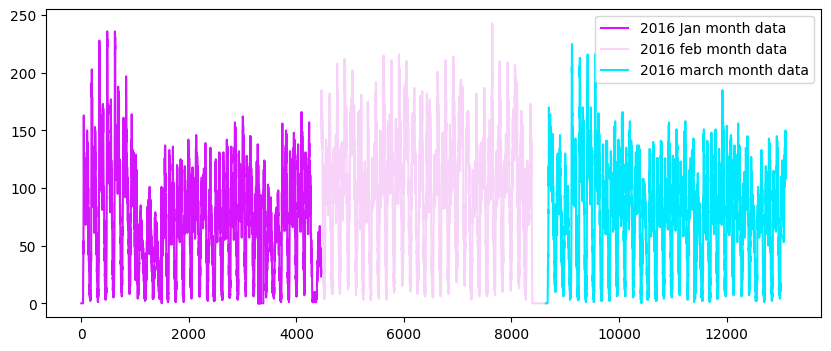

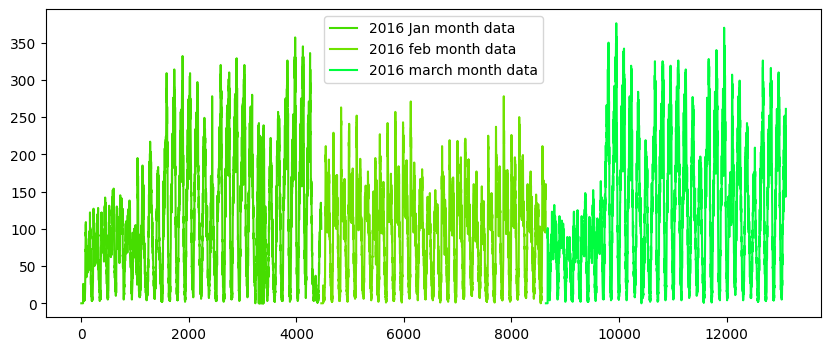

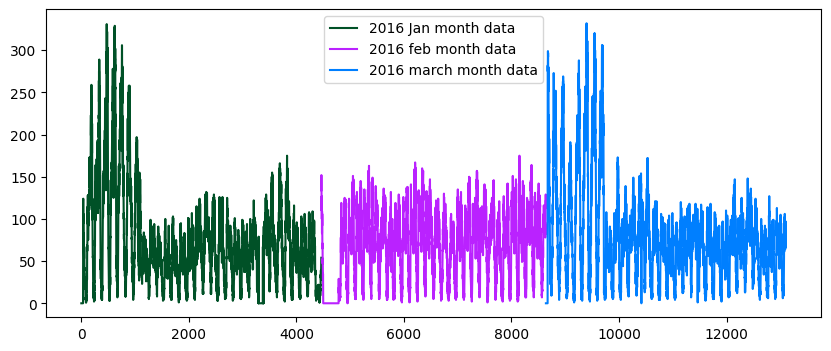

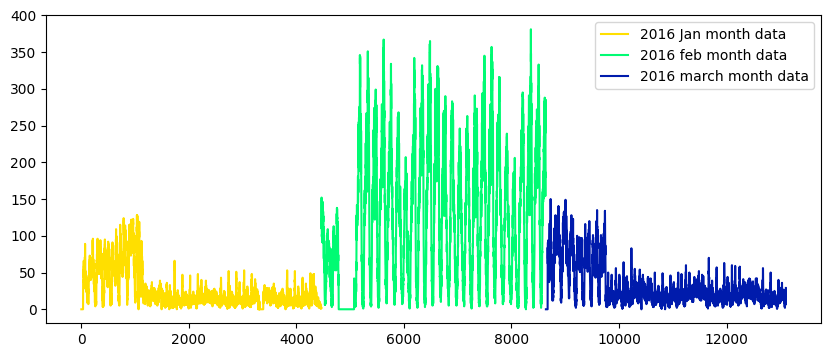

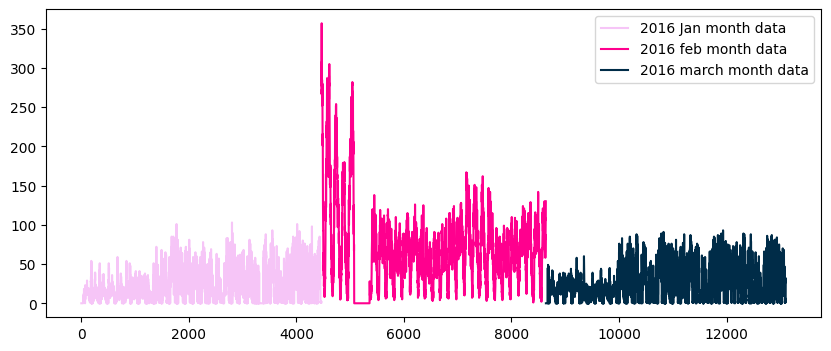

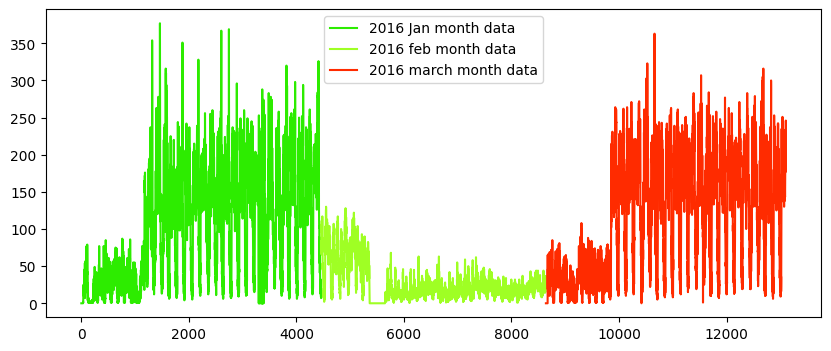

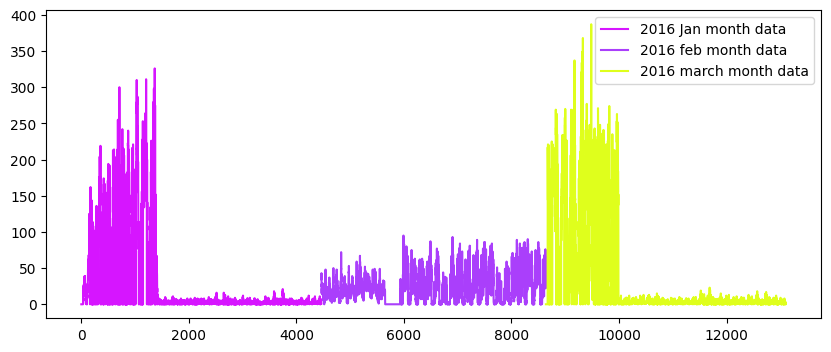

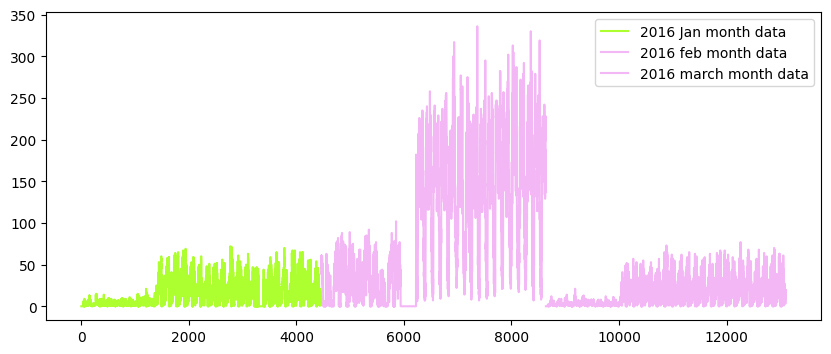

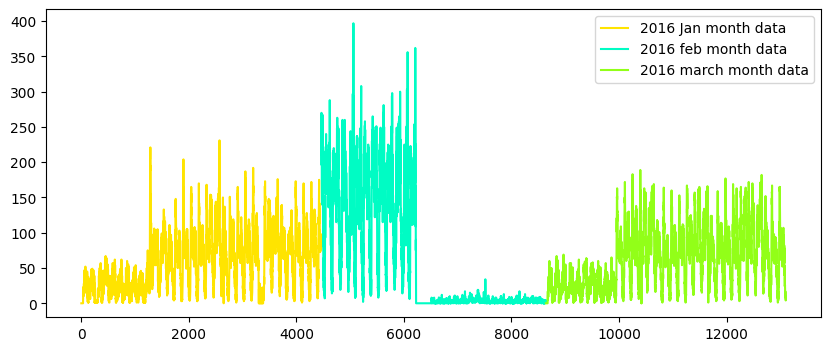

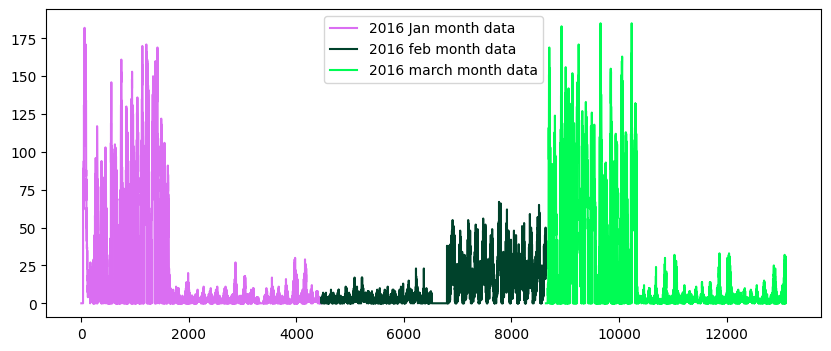

In [104]:
def uniqueish_color():
    """There're better ways to generate unique colors, but this isn't awful."""
    return plt.cm.gist_ncar(np.random.random())
first_x = list(range(0,4464))
second_x = list(range(4464,8640))
third_x = list(range(8640,13104))
for i in range(40):
    plt.figure(figsize=(10,4))
    plt.plot(first_x,regions_cum[i][:4464], color=uniqueish_color(), label='2016 Jan month data')
    plt.plot(second_x,regions_cum[i][4464:8640], color=uniqueish_color(), label='2016 feb month data')
    plt.plot(third_x,regions_cum[i][8640:], color=uniqueish_color(), label='2016 march month data')
    plt.legend()
    plt.show()

In [105]:
# test 1

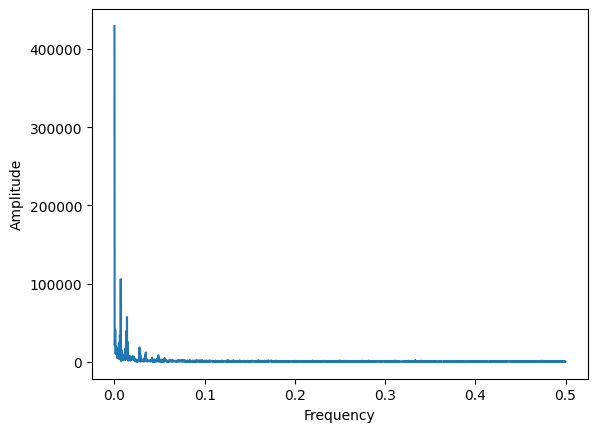

In [106]:
# getting peaks: https://blog.ytotech.com/2015/11/01/findpeaks-in-python/
# read more about fft function : https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html
Y    = np.fft.fft(np.array(jan_2016_smooth)[0:4460])
# read more about the fftfreq: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html  
freq = np.fft.fftfreq(4460, 1)
n = len(freq)
plt.figure()
plt.plot( freq[:int(n/2)], np.abs(Y)[:int(n/2)] )
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [107]:
# test

In [108]:
#Preparing the Dataframe only with x(i) values as jan-2015 data and y(i) values as jan-2016
ratios_jan = pd.DataFrame()
ratios_jan['Given']=jan_2015_smooth
ratios_jan['Prediction']=jan_2016_smooth
ratios_jan['Ratios']=ratios_jan['Prediction']*1.0/ratios_jan['Given']*1.0

## Modelling: Baseline Models


In [109]:
def MA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    error=[]
    predicted_values=[]
    window_size=3
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_ratio=sum((ratios['Ratios'].values)[(i+1)-window_size:(i+1)])/window_size
        else:
            predicted_ratio=sum((ratios['Ratios'].values)[0:(i+1)])/(i+1)
            
    
    ratios['MA_R_Predicted'] = predicted_values
    ratios['MA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [110]:
def MA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=1
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            predicted_value=int(sum((ratios['Prediction'].values)[(i+1)-window_size:(i+1)])/window_size)
        else:
            predicted_value=int(sum((ratios['Prediction'].values)[0:(i+1)])/(i+1))
            
    ratios['MA_P_Predicted'] = predicted_values
    ratios['MA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [111]:
def WA_R_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.5
    error=[]
    predicted_values=[]
    window_size=5
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Ratios'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Ratios'].values)[j-1]
                sum_of_coeff+=j
            predicted_ratio=sum_values/sum_of_coeff
            
    ratios['WA_R_Predicted'] = predicted_values
    ratios['WA_R_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [112]:
def WA_P_Predictions(ratios,month):
    predicted_value=(ratios['Prediction'].values)[0]
    error=[]
    predicted_values=[]
    window_size=2
    for i in range(0,4464*40):
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        if i+1>=window_size:
            sum_values=0
            sum_of_coeff=0
            for j in range(window_size,0,-1):
                sum_values += j*(ratios['Prediction'].values)[i-window_size+j]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)

        else:
            sum_values=0
            sum_of_coeff=0
            for j in range(i+1,0,-1):
                sum_values += j*(ratios['Prediction'].values)[j-1]
                sum_of_coeff+=j
            predicted_value=int(sum_values/sum_of_coeff)
    
    ratios['WA_P_Predicted'] = predicted_values
    ratios['WA_P_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [113]:
def EA_R1_Predictions(ratios,month):
    predicted_ratio=(ratios['Ratios'].values)[0]
    alpha=0.6
    error=[]
    predicted_values=[]
    predicted_ratio_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_ratio_values.append(0)
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_ratio_values.append(predicted_ratio)
        predicted_values.append(int(((ratios['Given'].values)[i])*predicted_ratio))
        error.append(abs((math.pow(int(((ratios['Given'].values)[i])*predicted_ratio)-(ratios['Prediction'].values)[i],1))))
        predicted_ratio = (alpha*predicted_ratio) + (1-alpha)*((ratios['Ratios'].values)[i])
    
    ratios['EA_R1_Predicted'] = predicted_values
    ratios['EA_R1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [114]:
def EA_P1_Predictions(ratios,month):
    predicted_value= (ratios['Prediction'].values)[0]
    alpha=0.3
    error=[]
    predicted_values=[]
    for i in range(0,4464*40):
        if i%4464==0:
            predicted_values.append(0)
            error.append(0)
            continue
        predicted_values.append(predicted_value)
        error.append(abs((math.pow(predicted_value-(ratios['Prediction'].values)[i],1))))
        predicted_value =int((alpha*predicted_value) + (1-alpha)*((ratios['Prediction'].values)[i]))
    
    ratios['EA_P1_Predicted'] = predicted_values
    ratios['EA_P1_Error'] = error
    mape_err = (sum(error)/len(error))/(sum(ratios['Prediction'].values)/len(ratios['Prediction'].values))
    mse_err = sum([e**2 for e in error])/len(error)
    return ratios,mape_err,mse_err

In [116]:
mean_err=[0]*10
median_err=[0]*10
ratios_jan,mean_err[0],median_err[0]=MA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[1],median_err[1]=MA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[2],median_err[2]=WA_R_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[3],median_err[3]=WA_P_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[4],median_err[4]=EA_R1_Predictions(ratios_jan,'jan')
ratios_jan,mean_err[5],median_err[5]=EA_P1_Predictions(ratios_jan,'jan')

In [117]:
print ("Error Metric Matrix (Forecasting Methods) - MAPE & MSE")
print ("--------------------------------------------------------------------------------------------------------")
print ("Moving Averages (Ratios) -                             MAPE: ",mean_err[0],"      MSE: ",median_err[0])
print ("Moving Averages (2016 Values) -                        MAPE: ",mean_err[1],"       MSE: ",median_err[1])
print ("--------------------------------------------------------------------------------------------------------")
print ("Weighted Moving Averages (Ratios) -                    MAPE: ",mean_err[2],"      MSE: ",median_err[2])
print ("Weighted Moving Averages (2016 Values) -               MAPE: ",mean_err[3],"      MSE: ",median_err[3])
print ("--------------------------------------------------------------------------------------------------------")
print ("Exponential Moving Averages (Ratios) -              MAPE: ",mean_err[4],"      MSE: ",median_err[4])
print ("Exponential Moving Averages (2016 Values) -         MAPE: ",mean_err[5],"      MSE: ",median_err[5])

Error Metric Matrix (Forecasting Methods) - MAPE & MSE
--------------------------------------------------------------------------------------------------------
Moving Averages (Ratios) -                             MAPE:  0.2402062714465594       MSE:  1445.6859038978494
Moving Averages (2016 Values) -                        MAPE:  0.15928987634757472        MSE:  293.4087645609319
--------------------------------------------------------------------------------------------------------
Weighted Moving Averages (Ratios) -                    MAPE:  0.23873696951010012       MSE:  1255.5623935931899
Weighted Moving Averages (2016 Values) -               MAPE:  0.15133630900271602       MSE:  255.18439180107526
--------------------------------------------------------------------------------------------------------
Exponential Moving Averages (Ratios) -              MAPE:  0.23843174446057527       MSE:  1224.5278113799284
Exponential Moving Averages (2016 Values) -         MAPE:  0.15086391

## Regression Models

### Train Test Split[](http://)

In [119]:
# Preparing data to be split into train and test, The below prepares data in cumulative form which will be later split into test and train
# number of 10min indices for jan 2015= 24*31*60/10 = 4464
# number of 10min indices for jan 2016 = 24*31*60/10 = 4464
# number of 10min indices for feb 2016 = 24*29*60/10 = 4176
# number of 10min indices for march 2016 = 24*31*60/10 = 4464
# regions_cum: it will contain 40 lists, each list will contain 4464+4176+4464 values which represents the number of pickups 
# that are happened for three months in 2016 data

# print(len(regions_cum))
# 40
# print(len(regions_cum[0]))
# 12960

# we take number of pickups that are happened in last 5 10min intravels
number_of_time_stamps = 5

# output varaible
# it is list of lists
# it will contain number of pickups 13099 for each cluster
output = []


# tsne_lat will contain 13104-5=13099 times lattitude of cluster center for every cluster
# Ex: [[cent_lat 13099times],[cent_lat 13099times], [cent_lat 13099times].... 40 lists]
# it is list of lists
tsne_lat = []


# tsne_lon will contain 13104-5=13099 times logitude of cluster center for every cluster
# Ex: [[cent_long 13099times],[cent_long 13099times], [cent_long 13099times].... 40 lists]
# it is list of lists
tsne_lon = []

# we will code each day 
# sunday = 0, monday=1, tue = 2, wed=3, thur=4, fri=5,sat=6
# for every cluster we will be adding 13099 values, each value represent to which day of the week that pickup bin belongs to
# it is list of lists
tsne_weekday = []

# its an numbpy array, of shape (523960, 5)
# each row corresponds to an entry in out data
# for the first row we will have [f0,f1,f2,f3,f4] fi=number of pickups happened in i+1th 10min intravel(bin)
# the second row will have [f1,f2,f3,f4,f5]
# the third row will have [f2,f3,f4,f5,f6]
# and so on...
tsne_feature = []


tsne_feature = [0]*number_of_time_stamps
for i in range(0,40):
    tsne_lat.append([kmeans.cluster_centers_[i][0]]*13099)
    tsne_lon.append([kmeans.cluster_centers_[i][1]]*13099)
    # jan 1st 2016 is thursday, so we start our day from 4: "(int(k/144))%7+4"
    # our prediction start from 5th 10min intravel since we need to have number of pickups that are happened in last 5 pickup bins
    tsne_weekday.append([int(((int(k/144))%7+4)%7) for k in range(5,4464+4176+4464)])
    # regions_cum is a list of lists [[x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], [x1,x2,x3..x13104], .. 40 lsits]
    tsne_feature = np.vstack((tsne_feature, [regions_cum[i][r:r+number_of_time_stamps] for r in range(0,len(regions_cum[i])-number_of_time_stamps)]))
    output.append(regions_cum[i][5:])
tsne_feature = tsne_feature[1:]

In [120]:
len(tsne_lat[0])*len(tsne_lat) == tsne_feature.shape[0] == len(tsne_weekday)*len(tsne_weekday[0]) == 40*13099 == len(output)*len(output[0])

True

In [121]:
# Getting the predictions of exponential moving averages to be used as a feature in cumulative form

# upto now we computed 8 features for every data point that starts from 50th min of the day
# 1. cluster center lattitude
# 2. cluster center longitude
# 3. day of the week 
# 4. f_t_1: number of pickups that are happened previous t-1th 10min intravel
# 5. f_t_2: number of pickups that are happened previous t-2th 10min intravel
# 6. f_t_3: number of pickups that are happened previous t-3th 10min intravel
# 7. f_t_4: number of pickups that are happened previous t-4th 10min intravel
# 8. f_t_5: number of pickups that are happened previous t-5th 10min intravel

# from the baseline models we said the exponential weighted moving avarage gives us the best error
# we will try to add the same exponential weighted moving avarage at t as a feature to our data
# exponential weighted moving avarage => p'(t) = alpha*p'(t-1) + (1-alpha)*P(t-1) 
alpha=0.3

# it is a temporary array that store exponential weighted moving avarage for each 10min intravel, 
# for each cluster it will get reset
# for every cluster it contains 13104 values
predicted_values=[]

# it is similar like tsne_lat
# it is list of lists
# predict_list is a list of lists [[x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], [x5,x6,x7..x13104], .. 40 lsits]
predict_list = []
tsne_flat_exp_avg = []
for r in range(0,40):
    for i in range(0,13104):
        if i==0:
            predicted_value= regions_cum[r][0]
            predicted_values.append(0)
            continue
        predicted_values.append(predicted_value)
        predicted_value =int((alpha*predicted_value) + (1-alpha)*(regions_cum[r][i]))
    predict_list.append(predicted_values[5:])
    predicted_values=[]

In [122]:
# train, test split : 70% 30% split
# Before we start predictions using the tree based regression models we take 3 months of 2016 pickup data 
# and split it such that for every region we have 70% data in train and 30% in test,
# ordered date-wise for every region
print("size of train data :", int(13099*0.7))
print("size of test data :", int(13099*0.3))

size of train data : 9169
size of test data : 3929


In [123]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
train_features =  [tsne_feature[i*13099:(13099*i+9169)] for i in range(0,40)]
# temp = [0]*(12955 - 9068)
test_features = [tsne_feature[(13099*(i))+9169:13099*(i+1)] for i in range(0,40)]

In [124]:
print("Number of data clusters",len(train_features), "Number of data points in trian data", len(train_features[0]), "Each data point contains", len(train_features[0][0]),"features")
print("Number of data clusters",len(train_features), "Number of data points in test data", len(test_features[0]), "Each data point contains", len(test_features[0][0]),"features")

Number of data clusters 40 Number of data points in trian data 9169 Each data point contains 5 features
Number of data clusters 40 Number of data points in test data 3930 Each data point contains 5 features


In [125]:
# extracting first 9169 timestamp values i.e 70% of 13099 (total timestamps) for our training data
tsne_train_flat_lat = [i[:9169] for i in tsne_lat]
tsne_train_flat_lon = [i[:9169] for i in tsne_lon]
tsne_train_flat_weekday = [i[:9169] for i in tsne_weekday]
tsne_train_flat_output = [i[:9169] for i in output]
tsne_train_flat_exp_avg = [i[:9169] for i in predict_list]

In [126]:
# extracting the rest of the timestamp values i.e 30% of 12956 (total timestamps) for our test data
tsne_test_flat_lat = [i[9169:] for i in tsne_lat]
tsne_test_flat_lon = [i[9169:] for i in tsne_lon]
tsne_test_flat_weekday = [i[9169:] for i in tsne_weekday]
tsne_test_flat_output = [i[9169:] for i in output]
tsne_test_flat_exp_avg = [i[9169:] for i in predict_list]

In [127]:
# the above contains values in the form of list of lists (i.e. list of values of each region), here we make all of them in one list
train_new_features = []
for i in range(0,40):
    train_new_features.extend(train_features[i])
test_new_features = []
for i in range(0,40):
    test_new_features.extend(test_features[i])

In [128]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_train_lat = sum(tsne_train_flat_lat, [])
tsne_train_lon = sum(tsne_train_flat_lon, [])
tsne_train_weekday = sum(tsne_train_flat_weekday, [])
tsne_train_output = sum(tsne_train_flat_output, [])
tsne_train_exp_avg = sum(tsne_train_flat_exp_avg,[])

In [129]:
# converting lists of lists into sinle list i.e flatten
# a  = [[1,2,3,4],[4,6,7,8]]
# print(sum(a,[]))
# [1, 2, 3, 4, 4, 6, 7, 8]

tsne_test_lat = sum(tsne_test_flat_lat, [])
tsne_test_lon = sum(tsne_test_flat_lon, [])
tsne_test_weekday = sum(tsne_test_flat_weekday, [])
tsne_test_output = sum(tsne_test_flat_output, [])
tsne_test_exp_avg = sum(tsne_test_flat_exp_avg,[])

In [130]:
# Preparing the data frame for our train data
columns = ['ft_5','ft_4','ft_3','ft_2','ft_1']
df_train = pd.DataFrame(data=train_new_features, columns=columns) 
df_train['lat'] = tsne_train_lat
df_train['lon'] = tsne_train_lon
df_train['weekday'] = tsne_train_weekday
df_train['exp_avg'] = tsne_train_exp_avg

print(df_train.shape)

(366760, 9)


In [131]:
# Preparing the data frame for our train data
df_test = pd.DataFrame(data=test_new_features, columns=columns) 
df_test['lat'] = tsne_test_lat
df_test['lon'] = tsne_test_lon
df_test['weekday'] = tsne_test_weekday
df_test['exp_avg'] = tsne_test_exp_avg
print(df_test.shape)

(157200, 9)


In [132]:
df_test.head()

ft_5  ft_4  ft_3  ft_2  ft_1        lat        lon  weekday  exp_avg
0   150   110    92   116   128  40.744441 -73.984865        4      122
1   110    92   116   128   126  40.744441 -73.984865        4      124
2    92   116   128   126   141  40.744441 -73.984865        4      135
3   116   128   126   141   132  40.744441 -73.984865        4      132
4   128   126   141   132   132  40.744441 -73.984865        4      132

### Using Linear Regression

# we need to do hyperparameter tuning as part of ex

In [133]:
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
# -------------------------
# default paramters
# sklearn.linear_model.LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)

# some of methods of LinearRegression()
# fit(X, y[, sample_weight])	Fit linear model.
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict using the linear model
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# set_params(**params)	Set the parameters of this estimator.
# -----------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1-2-copy-8/
# -----------------------

from sklearn.linear_model import LinearRegression
lr_reg=LinearRegression().fit(df_train, tsne_train_output)

y_pred = lr_reg.predict(df_test)
lr_test_predictions = [round(value) for value in y_pred]
y_pred = lr_reg.predict(df_train)
lr_train_predictions = [round(value) for value in y_pred]

### Using Random Forest Regressor

In [134]:
# Training a hyper-parameter tuned random forest regressor on our train data
# find more about LinearRegression function here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
# -------------------------
# default paramters
# sklearn.ensemble.RandomForestRegressor(n_estimators=10, criterion=’mse’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False)

# some of methods of RandomForestRegressor()
# apply(X)	Apply trees in the forest to X, return leaf indices.
# decision_path(X)	Return the decision path in the forest
# fit(X, y[, sample_weight])	Build a forest of trees from the training set (X, y).
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict regression target for X.
# score(X, y[, sample_weight])	Returns the coefficient of determination R^2 of the prediction.
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

regr1 = RandomForestRegressor(max_features='sqrt',min_samples_leaf=4,min_samples_split=3,n_estimators=40, n_jobs=-1)
regr1.fit(df_train, tsne_train_output)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=3, n_estimators=40, n_jobs=-1)

In [135]:
# Predicting on test data using our trained random forest model 

# the models regr1 is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = regr1.predict(df_test)
rndf_test_predictions = [round(value) for value in y_pred]
y_pred = regr1.predict(df_train)
rndf_train_predictions = [round(value) for value in y_pred]

In [136]:
#feature importances based on analysis using random forest
print (df_train.columns)
print (regr1.feature_importances_)

Index(['ft_5', 'ft_4', 'ft_3', 'ft_2', 'ft_1', 'lat', 'lon', 'weekday',
       'exp_avg'],
      dtype='object')
[0.04453239 0.06104143 0.19347358 0.17701369 0.20051445 0.00282986
 0.00268829 0.0019131  0.31599322]


### Using XgBoost Regressor

In [137]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBRegressor function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#module-xgboost.sklearn
# -------------------------
# default paramters
# xgboost.XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, objective='reg:linear', 
# booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, 
# colsample_bylevel=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, 
# missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_model = xgb.XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 reg_alpha=200, reg_lambda=200,
 colsample_bytree=0.8,nthread=4)
x_model.fit(df_train, tsne_train_output)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, nthread=4,
             num_parallel_tree=None, ...)

In [138]:
#predicting with our trained Xg-Boost regressor
# the models x_model is already hyper parameter tuned
# the parameters that we got above are found using grid search

y_pred = x_model.predict(df_test)
xgb_test_predictions = [round(value) for value in y_pred]
y_pred = x_model.predict(df_train)
xgb_train_predictions = [round(value) for value in y_pred]

In [141]:
#feature importances

# x_model.booster().get_score(importance_type='weight')

# resolve this issue later